# **Project Name (Bigmart Sales Dataset)**
AUTHOR : **Jamshed Butt**
           from **MACHINE LEARNING ENGINEER**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ5giJqwHM3QPu5r6wyYq-J6OIVmmU2Z-Bs1g&usqp=CAU)

# THE PLAN OF THE PROJECT :    


---

---




1.THE PROBLEM STATEMENT

2.HYPOTHESIS GENERATION

3.LOADING PACKAGES AND DATA

4.DATA STRUCTURE AND CONENT

5.UNIVARIATE ANALYSIS

6.EDA AND PREPROCESSING OF THE DATA

7.FEATURE ENGINEERING

8.CREATE MODEL

9.SAVING THE MODEL



---

---






# 1).PROBLEM STATEMENT :     

**The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.**

###  🦾 AIM OF THE PROJECT 🦾

**The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.**

# 2).HYPOTHESIS GENERATION :    

**Sales of a particular product are influenced by its price.**

**EXPLANATION :  The price of a product may influence customer purchasing decisions, with higher prices leading to lower sales, and lower prices leading to higher sales.**

# 3).LOADING PACKAGES AND DATA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import joblib
import pickle


import statsmodels.api as sm
from scipy import stats
import pylab

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_regression,SelectKBest

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Big Mart Dataset/Train.csv")

# 4). Exploring Data

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#train
df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

In [ ]:
df["Item_MRP"].value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

In [ ]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
df[["Outlet_Type","Item_Outlet_Sales"]]

,Outlet_Type,Item_Outlet_Sales
0,Supermarket Type1,3735.1380
1,Supermarket Type2,443.4228
2,Supermarket Type1,2097.2700
3,Grocery Store,732.3800
4,Supermarket Type1,994.7052
...,...,...
8518,Supermarket Type1,2778.3834
8519,Supermarket Type1,549.2850
8520,Supermarket Type1,1193.1136
8521,Supermarket Type2,1845.5976


# 5). Univariate Analysis

Univariate Analysis for **Categorical data**

---

---

1.Item_Identifier

2.Item_Fat_Content

3.Item_Type

4.Outlet_Identifier

5.Outlet_Size

6.Outlet_Location_Type

7.Outlet_Type

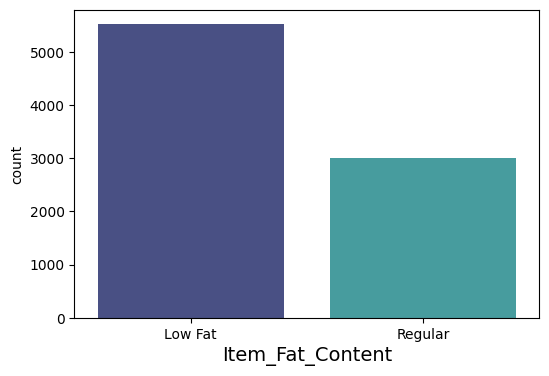

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=df ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

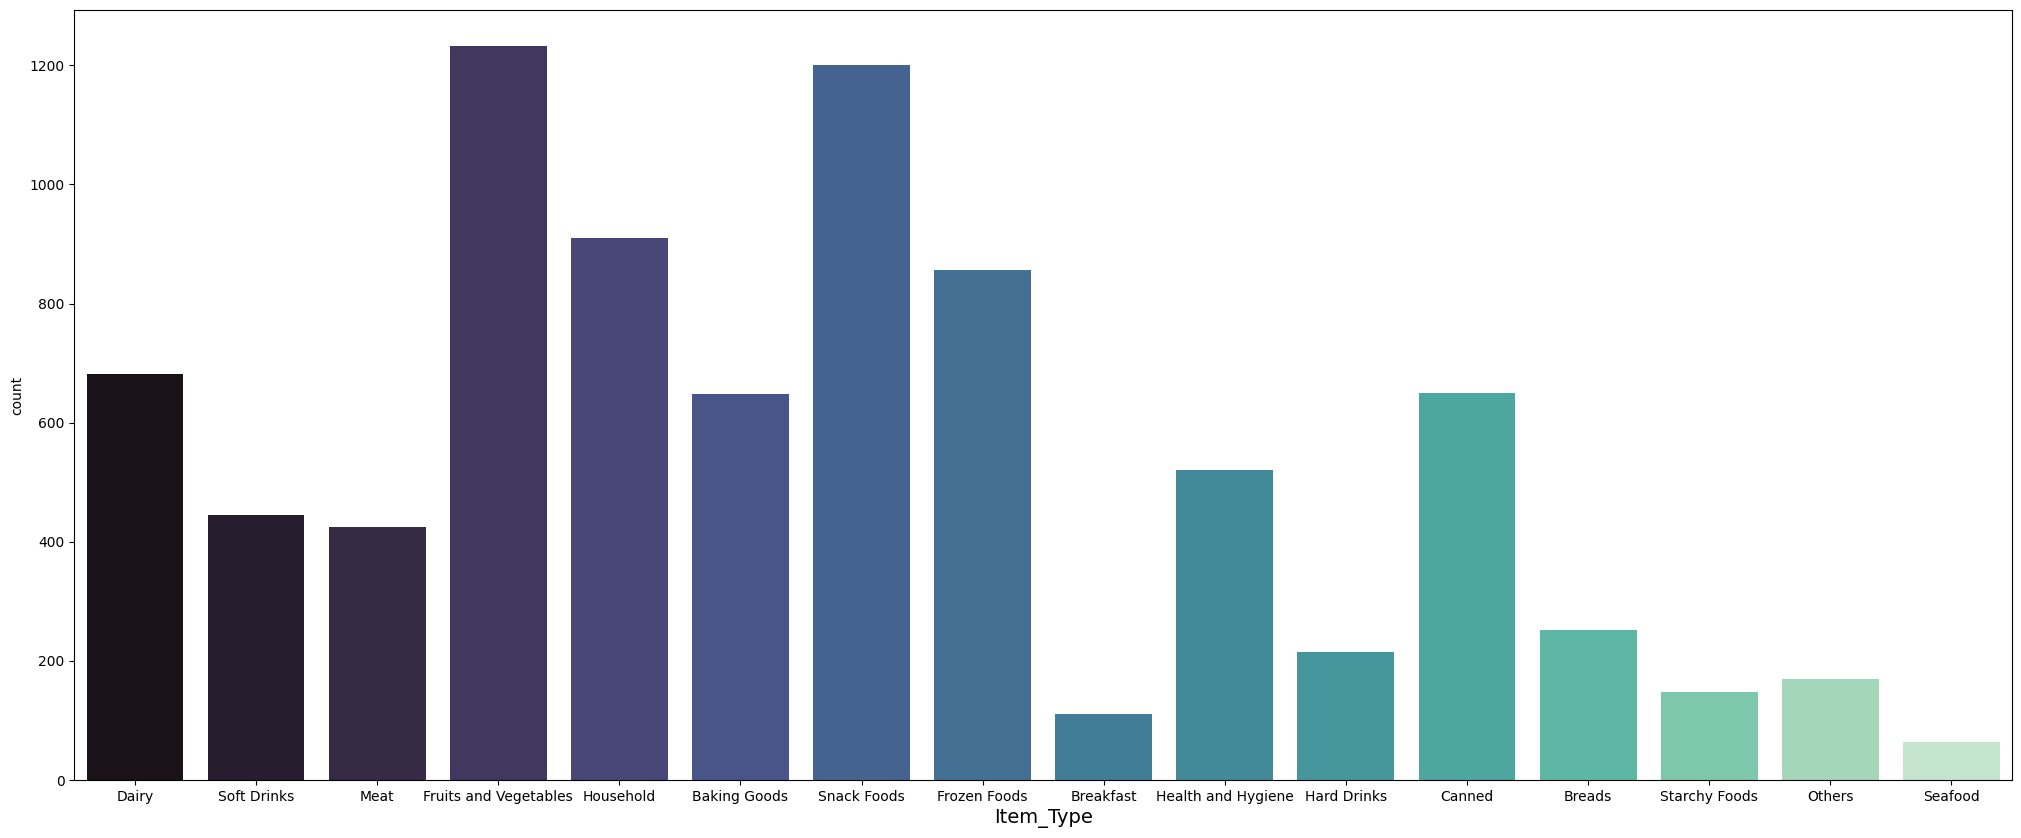

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x="Item_Type", data=df, palette="mako")
plt.xlabel("Item_Type", fontsize=14)
plt.show()

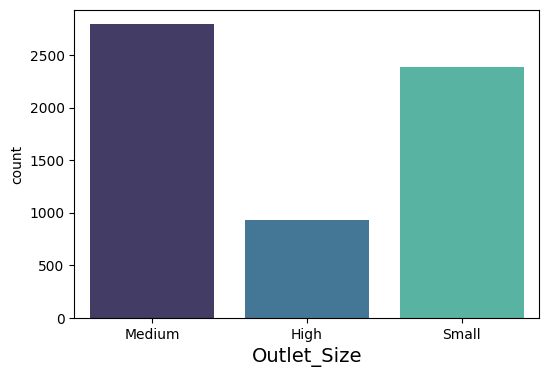

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Outlet_Size", data=df, palette="mako")
plt.xlabel("Outlet_Size", fontsize=14)
plt.show()

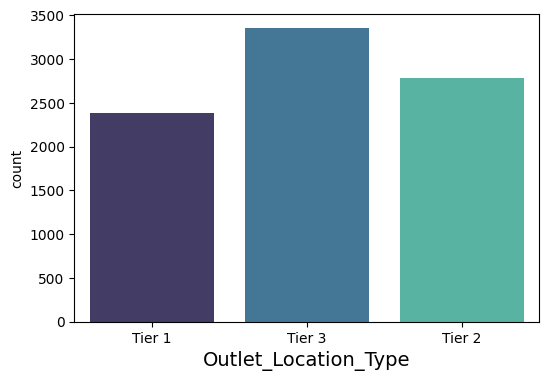

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Outlet_Location_Type", data=df, palette="mako")
plt.xlabel("Outlet_Location_Type", fontsize=14)
plt.show()

<Axes: >

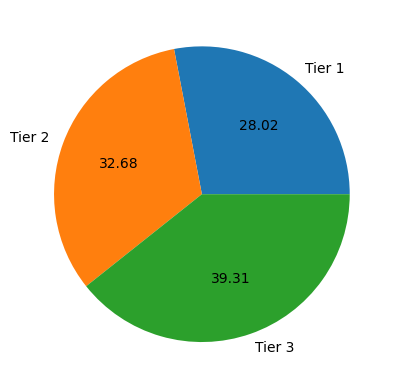

In [ ]:
df.groupby('Outlet_Location_Type').size().plot(kind='pie', autopct='%.2f')

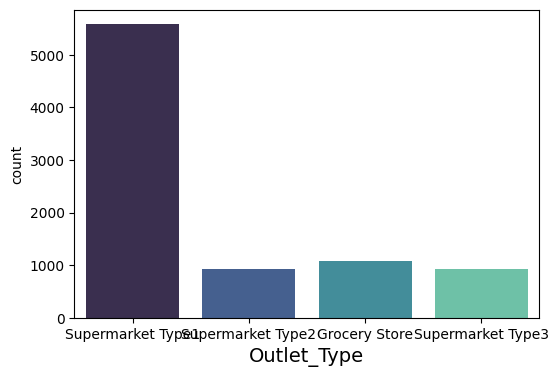

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Outlet_Type", data=df, palette="mako")
plt.xlabel("Outlet_Type", fontsize=14)
plt.show()

<Axes: >

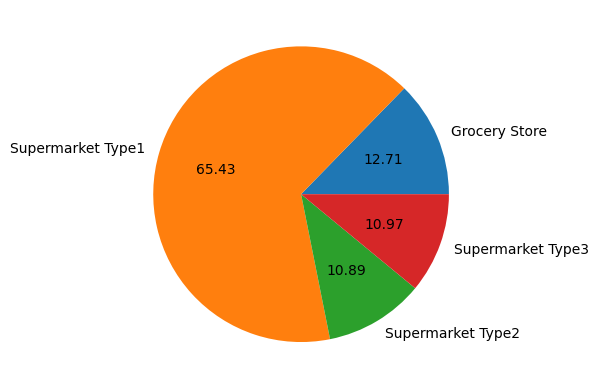

In [ ]:
df.groupby('Outlet_Type').size().plot(kind='pie', autopct='%.2f')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Univariate Analysis for **Numerical data**

---

---

1.Item_Weight

2.Item_Visibility

3.Item_MRP

4.Outlet_Establishment_Year

5.Item_Outlet_Sales

<ipython-input-19-44a44cba4a64>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Item_Weight"], shade=True)


<Axes: xlabel='Item_Weight', ylabel='Density'>

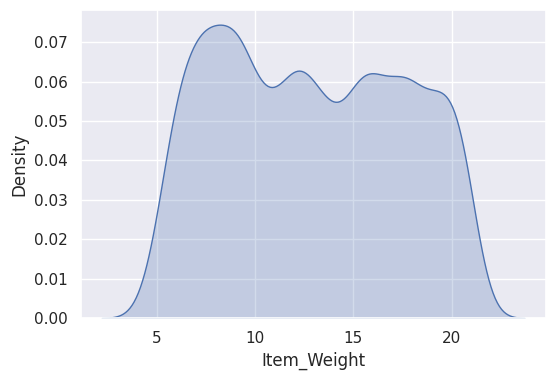

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.kdeplot(df["Item_Weight"], shade=True)

<ipython-input-20-ac28daa18c5d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Item_Visibility"], kde=False, color="orange", bins=10)


<Axes: xlabel='Item_Visibility'>

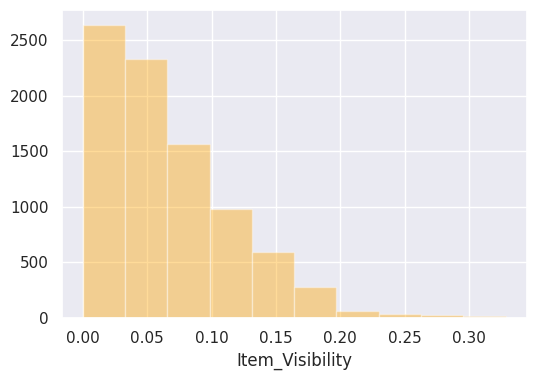

In [ ]:
sns.distplot(df["Item_Visibility"], kde=False, color="orange", bins=10)

<ipython-input-21-8a6b9b841629>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Item_Visibility"], shade=True)


<Axes: xlabel='Item_Visibility', ylabel='Density'>

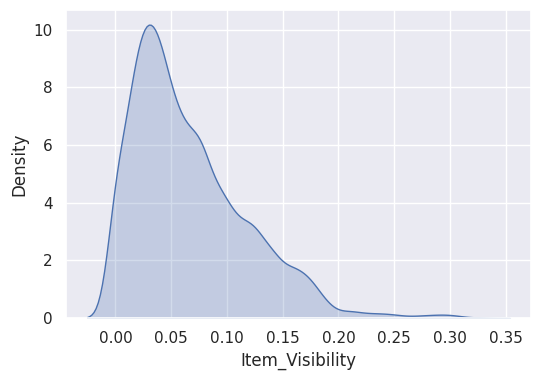

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.kdeplot(df["Item_Visibility"], shade=True)

<ipython-input-22-4cbba978b0cf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Item_MRP"], kde=False, color = "orange", bins=10)


<Axes: xlabel='Item_MRP'>

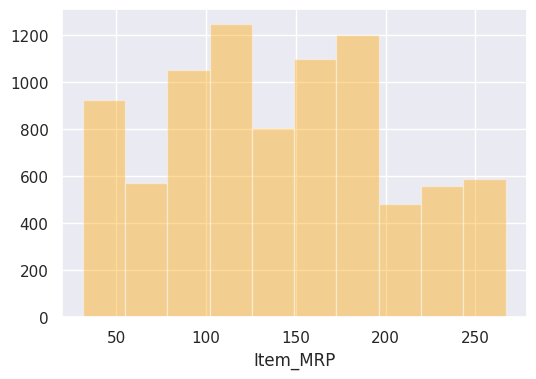

In [ ]:
sns.distplot(df["Item_MRP"], kde=False, color = "orange", bins=10)

<ipython-input-23-295bdabab79b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Item_MRP"], shade=True)


<Axes: xlabel='Item_MRP', ylabel='Density'>

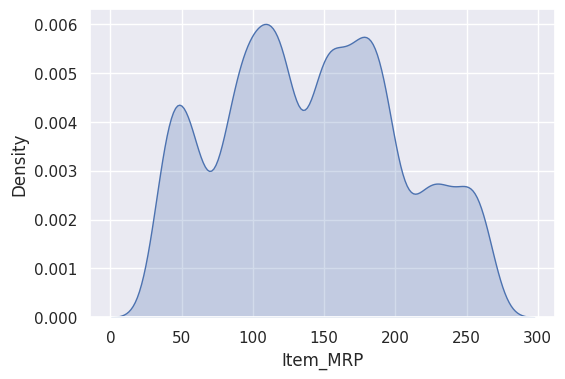

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.kdeplot(df["Item_MRP"], shade=True)

<ipython-input-24-d9dac1b32e39>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Outlet_Establishment_Year"], kde=False, color="orange", bins=10)


<Axes: xlabel='Outlet_Establishment_Year'>

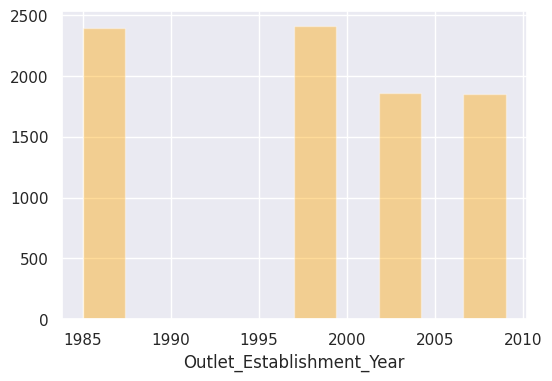

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Outlet_Establishment_Year"], kde=False, color="orange", bins=10)

<ipython-input-25-0902637f368a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Outlet_Establishment_Year"], shade=True)


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Density'>

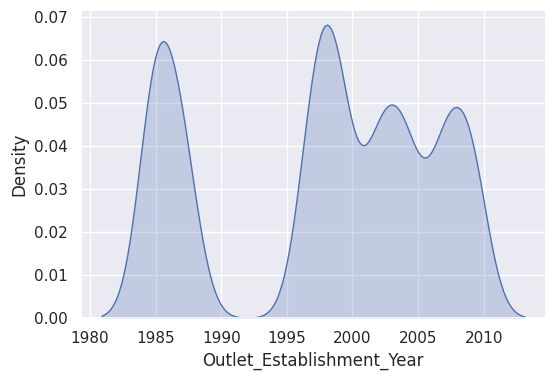

In [ ]:
sns.kdeplot(df["Outlet_Establishment_Year"], shade=True)

<ipython-input-26-af965b92a7af>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Item_Outlet_Sales"], kde=True, color="orange", bins=10)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

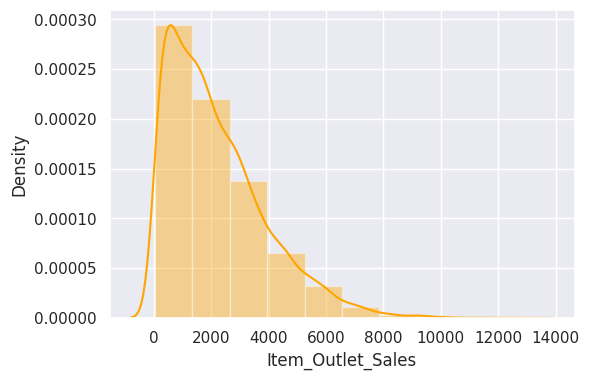

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Item_Outlet_Sales"], kde=True, color="orange", bins=10)

# 6).EDA (Exploratory Data Analysis)

#### Remove NaN Values

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [ ]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df["Outlet_Size"].mode().values[0]

'Medium'

In [ ]:
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].mode().values[0])

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Removeing Duplicate

In [ ]:
duplicate = df.duplicated()
print(duplicate.sum())

0


#### Removing Outlier

<Axes: xlabel='Item_Weight'>

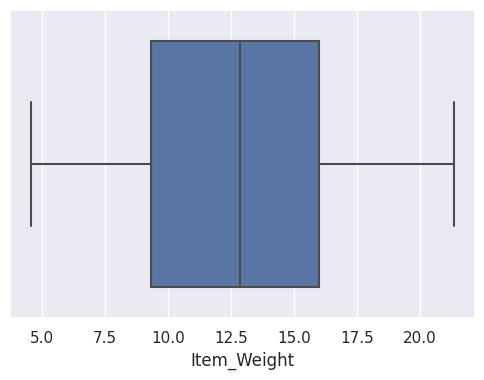

In [ ]:
sns.boxplot(x=df["Item_Weight"])

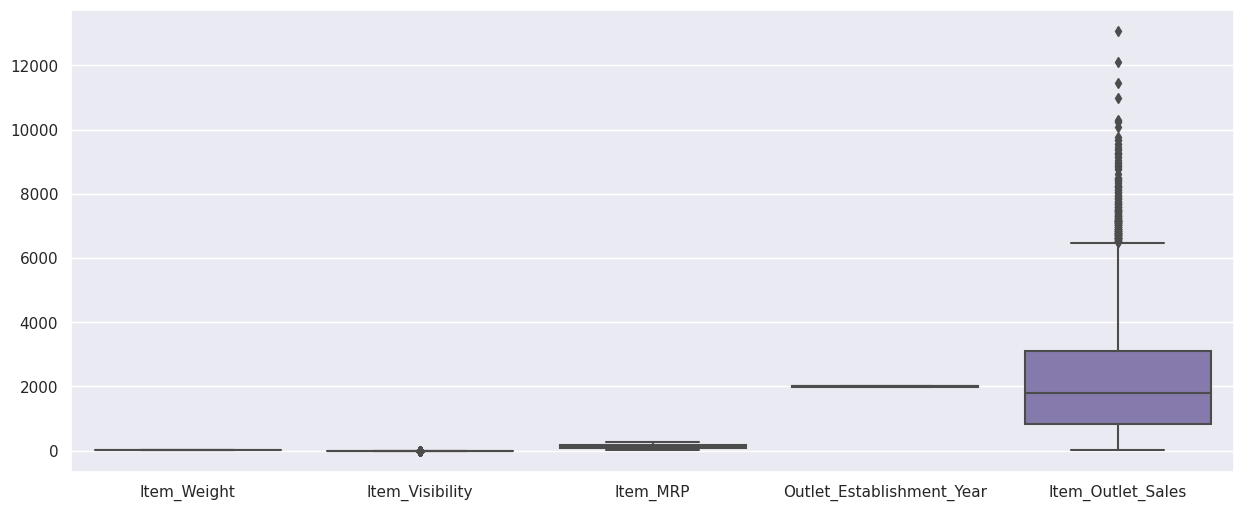

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15,6))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

In [ ]:
num_cols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [ ]:
lower_range,upper_range = remove_outlier(df["Item_Weight"])
df["Item_Weight"] = np.where(df["Item_Weight"] > upper_range, upper_range, df["Item_Weight"])
df["Item_Weight"] = np.where(df["Item_Weight"] < lower_range, lower_range, df["Item_Weight"])

In [ ]:
lower_range,upper_range = remove_outlier(df["Item_Visibility"])
df["Item_Visibility"] = np.where(df["Item_Visibility"] > upper_range, upper_range, df["Item_Visibility"])
df["Item_Visibility"] = np.where(df["Item_Visibility"] < lower_range, lower_range, df["Item_Visibility"])

In [ ]:
lower_range,upper_range = remove_outlier(df["Item_MRP"])
df["Item_MRP"] = np.where(df["Item_MRP"] > upper_range, upper_range, df["Item_MRP"])
df["Item_MRP"] = np.where(df["Item_MRP"] < lower_range, lower_range, df["Item_MRP"])

In [ ]:
lower_range,upper_range = remove_outlier(df["Outlet_Establishment_Year"])
df["Outlet_Establishment_Year"] = np.where(df["Outlet_Establishment_Year"] > upper_range, upper_range, df["Outlet_Establishment_Year"])
df["Outlet_Establishment_Year"] = np.where(df["Outlet_Establishment_Year"] < lower_range, lower_range, df["Outlet_Establishment_Year"])

In [ ]:
lower_range,upper_range = remove_outlier(df["Item_Outlet_Sales"])
df["Item_Outlet_Sales"] = np.where(df["Item_Outlet_Sales"] > upper_range, upper_range, df["Item_Outlet_Sales"])
df["Item_Outlet_Sales"] = np.where(df["Item_Outlet_Sales"] < lower_range, lower_range, df["Item_Outlet_Sales"])

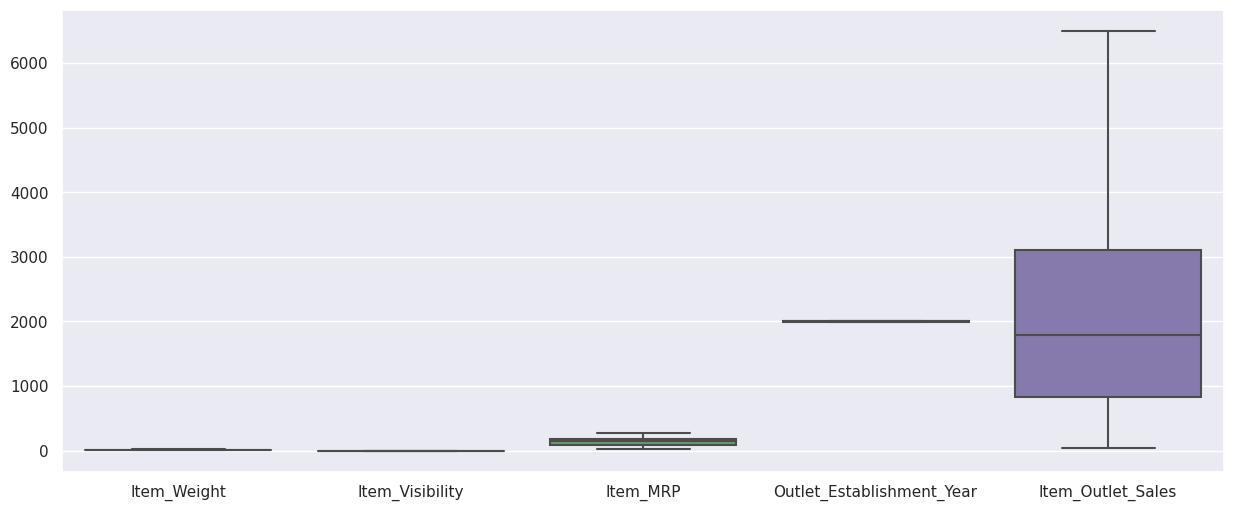

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15,6))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

#### **Bivariat Analysis**

In [ ]:
num_col = df.select_dtypes(["float"])
num_col.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
obj_col = df.select_dtypes(["object"])
obj_col.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

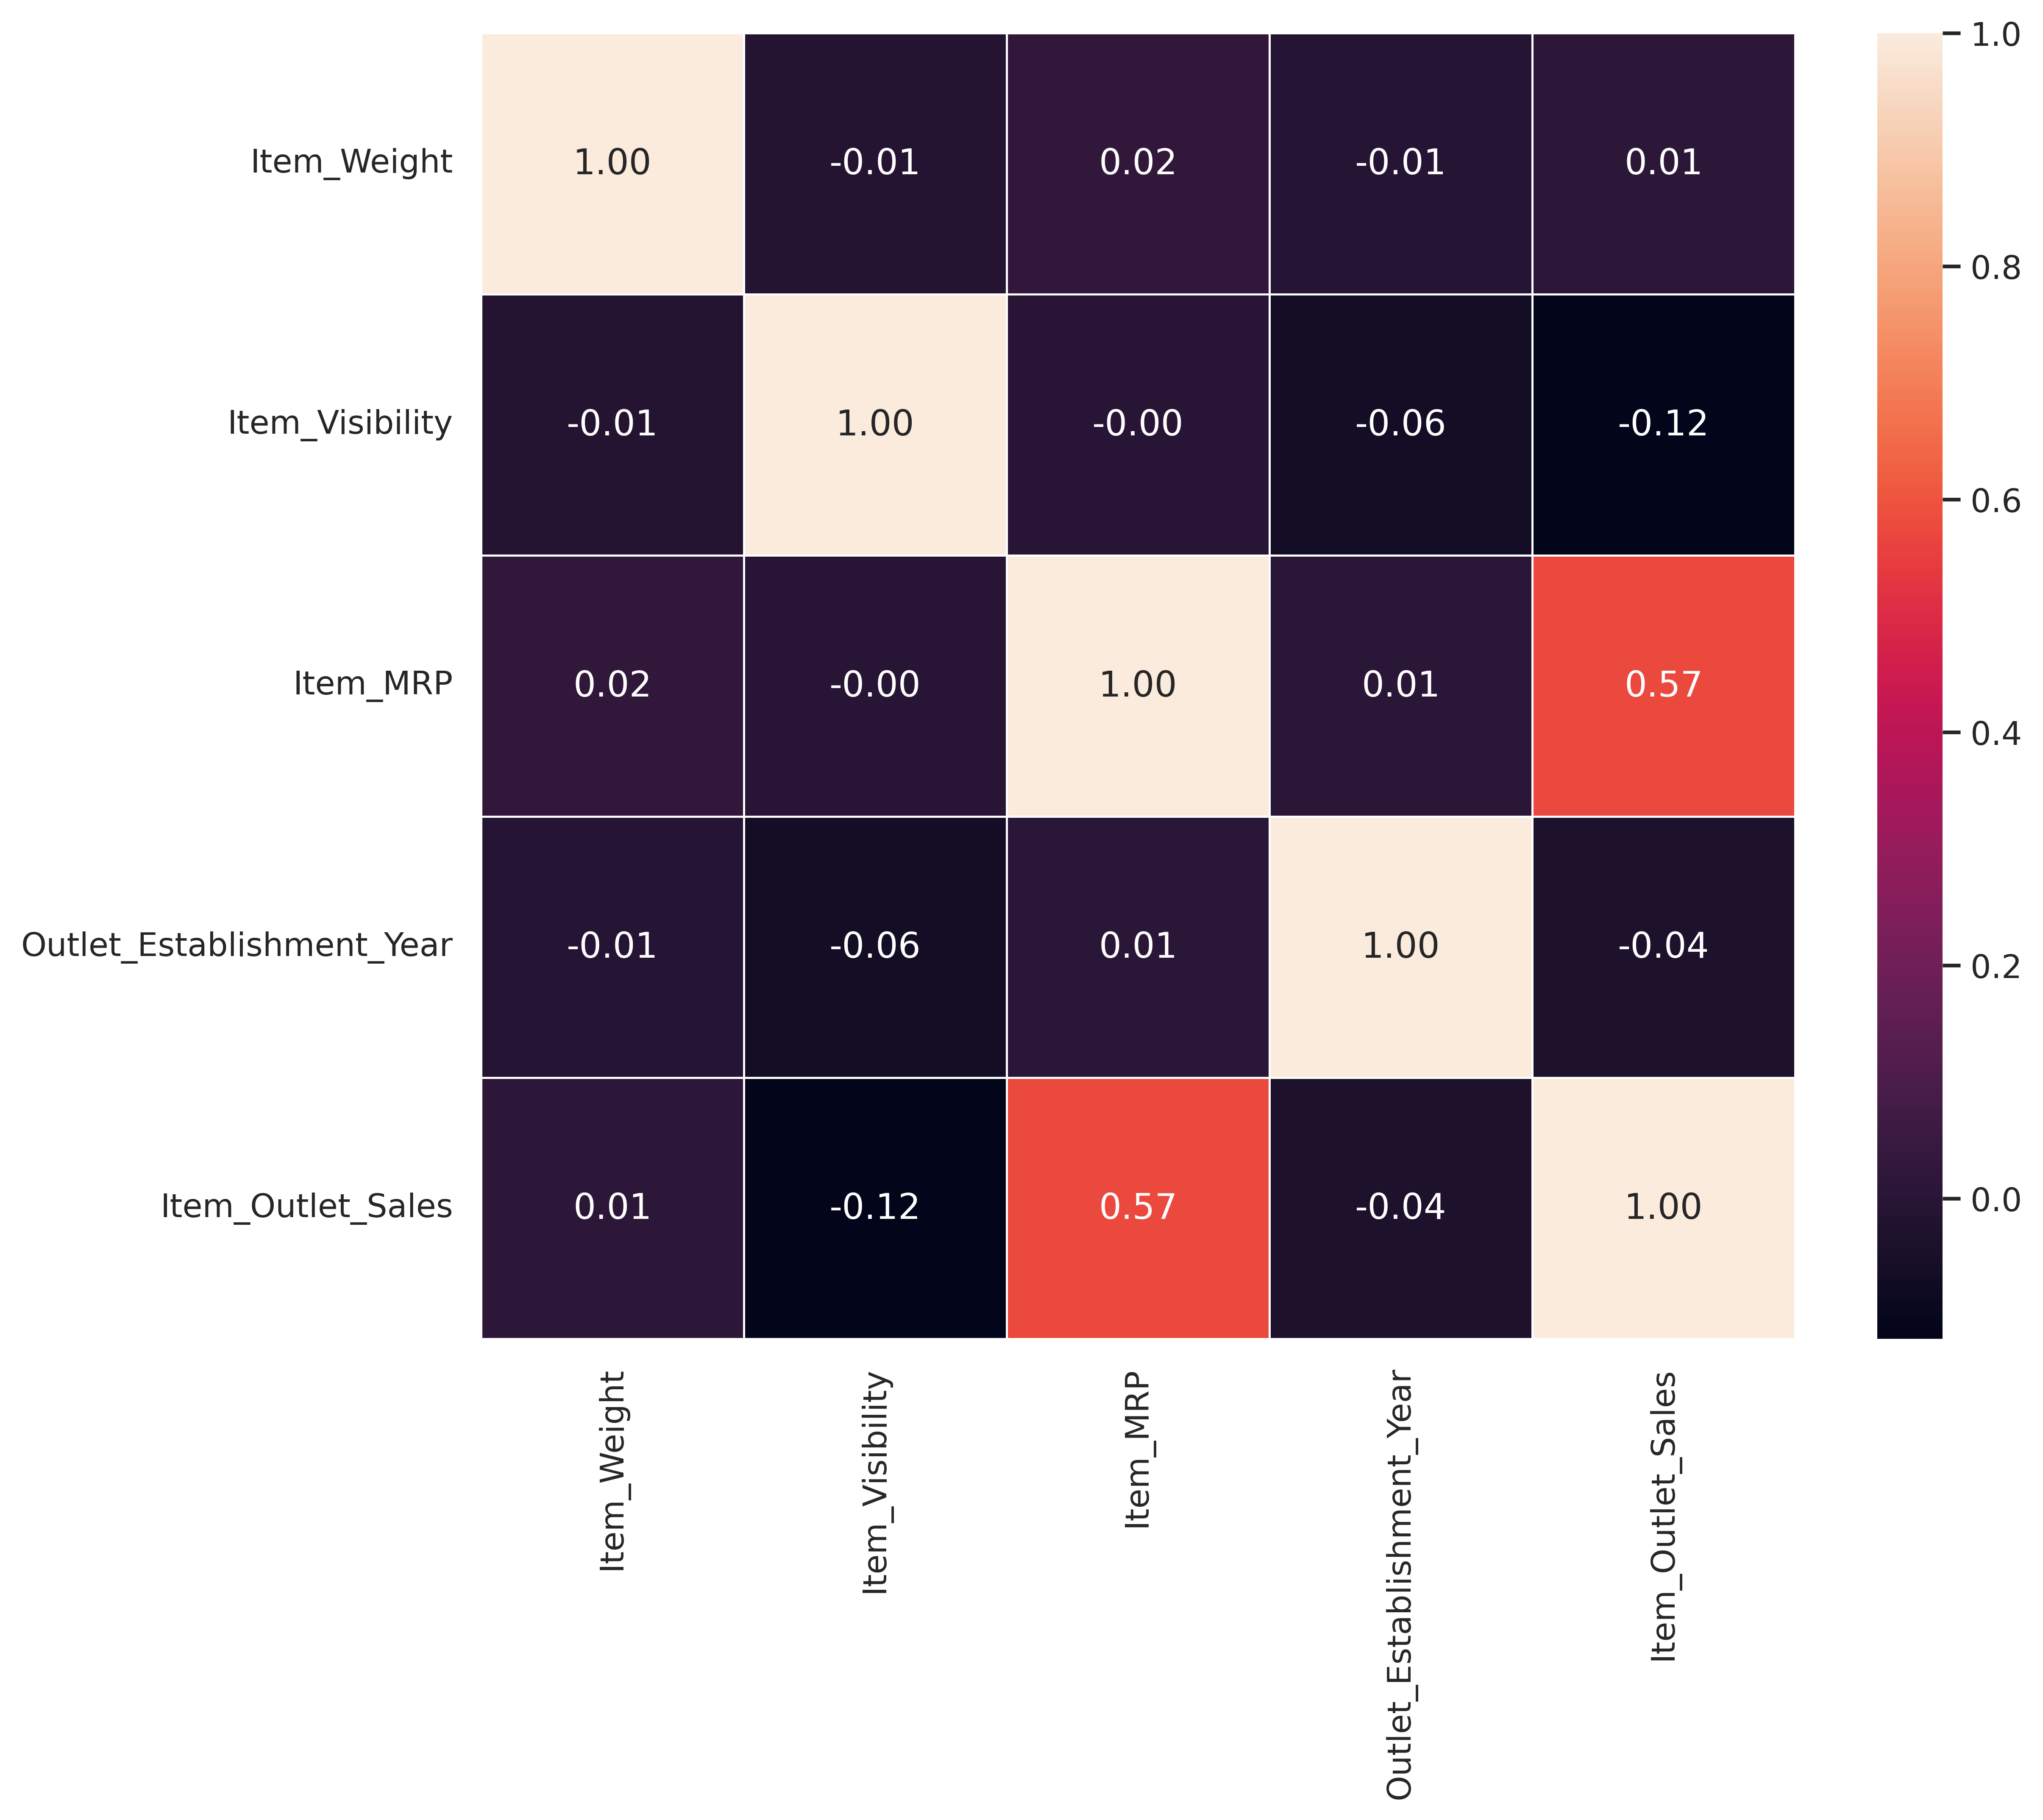

In [ ]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(num_col.corr(),annot=True,fmt=".2f", linewidth=.5)
plt.show()

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_MRP'>

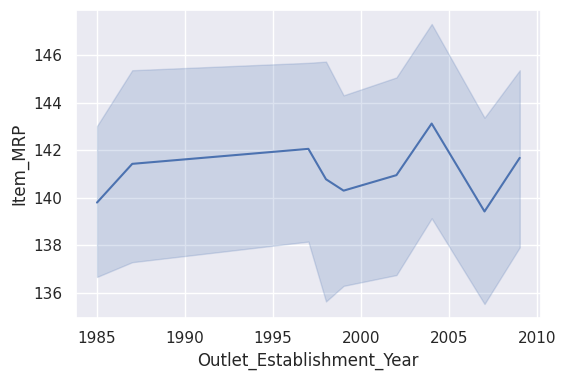

In [ ]:
sns.lineplot(data=df, x="Outlet_Establishment_Year", y="Item_MRP")

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

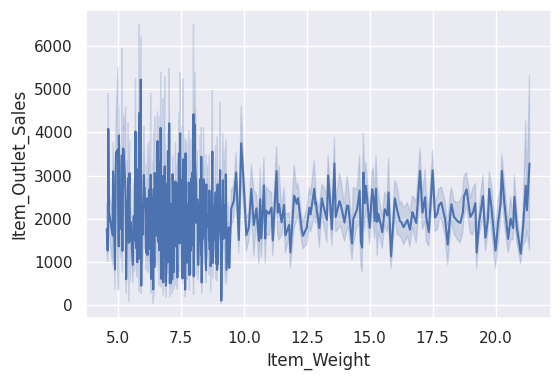

In [ ]:
sns.lineplot(data=df, x="Item_Weight", y="Item_Outlet_Sales")

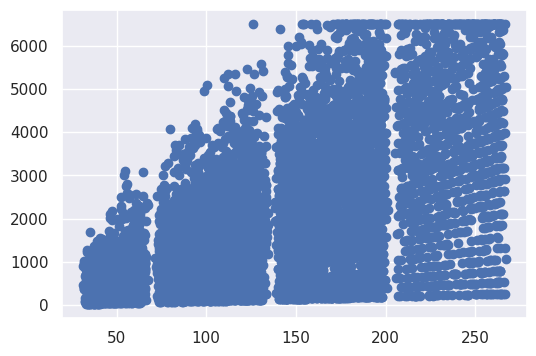

In [ ]:
plt.scatter(data=df, x="Item_MRP", y="Item_Outlet_Sales")

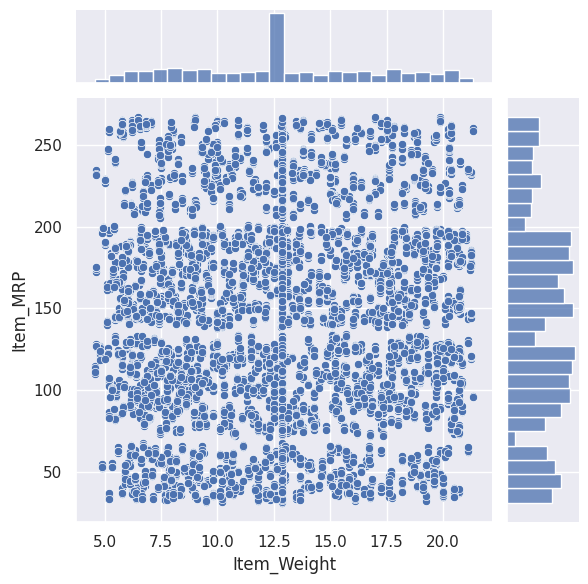

In [ ]:
sns.jointplot(data=df, x="Item_Weight", y="Item_MRP")

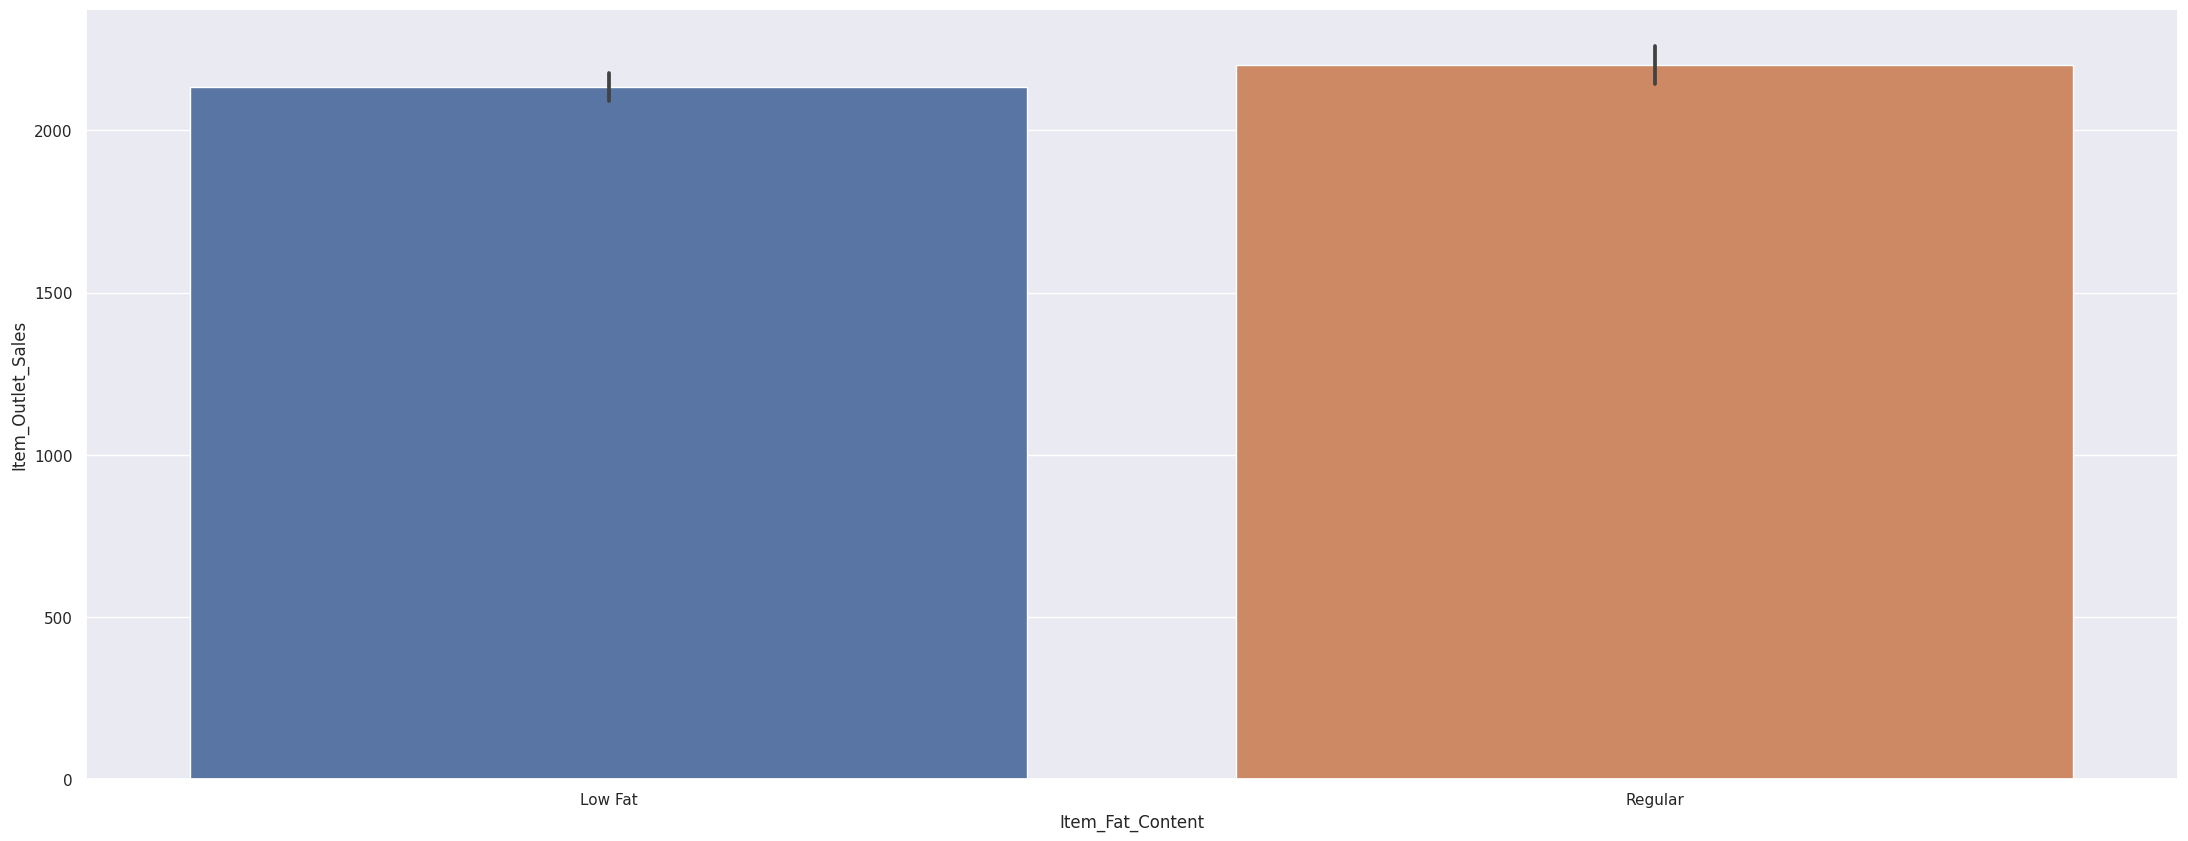

In [ ]:
plt.figure(figsize=(27,10))
sns.barplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales', data=df)
plt.show()

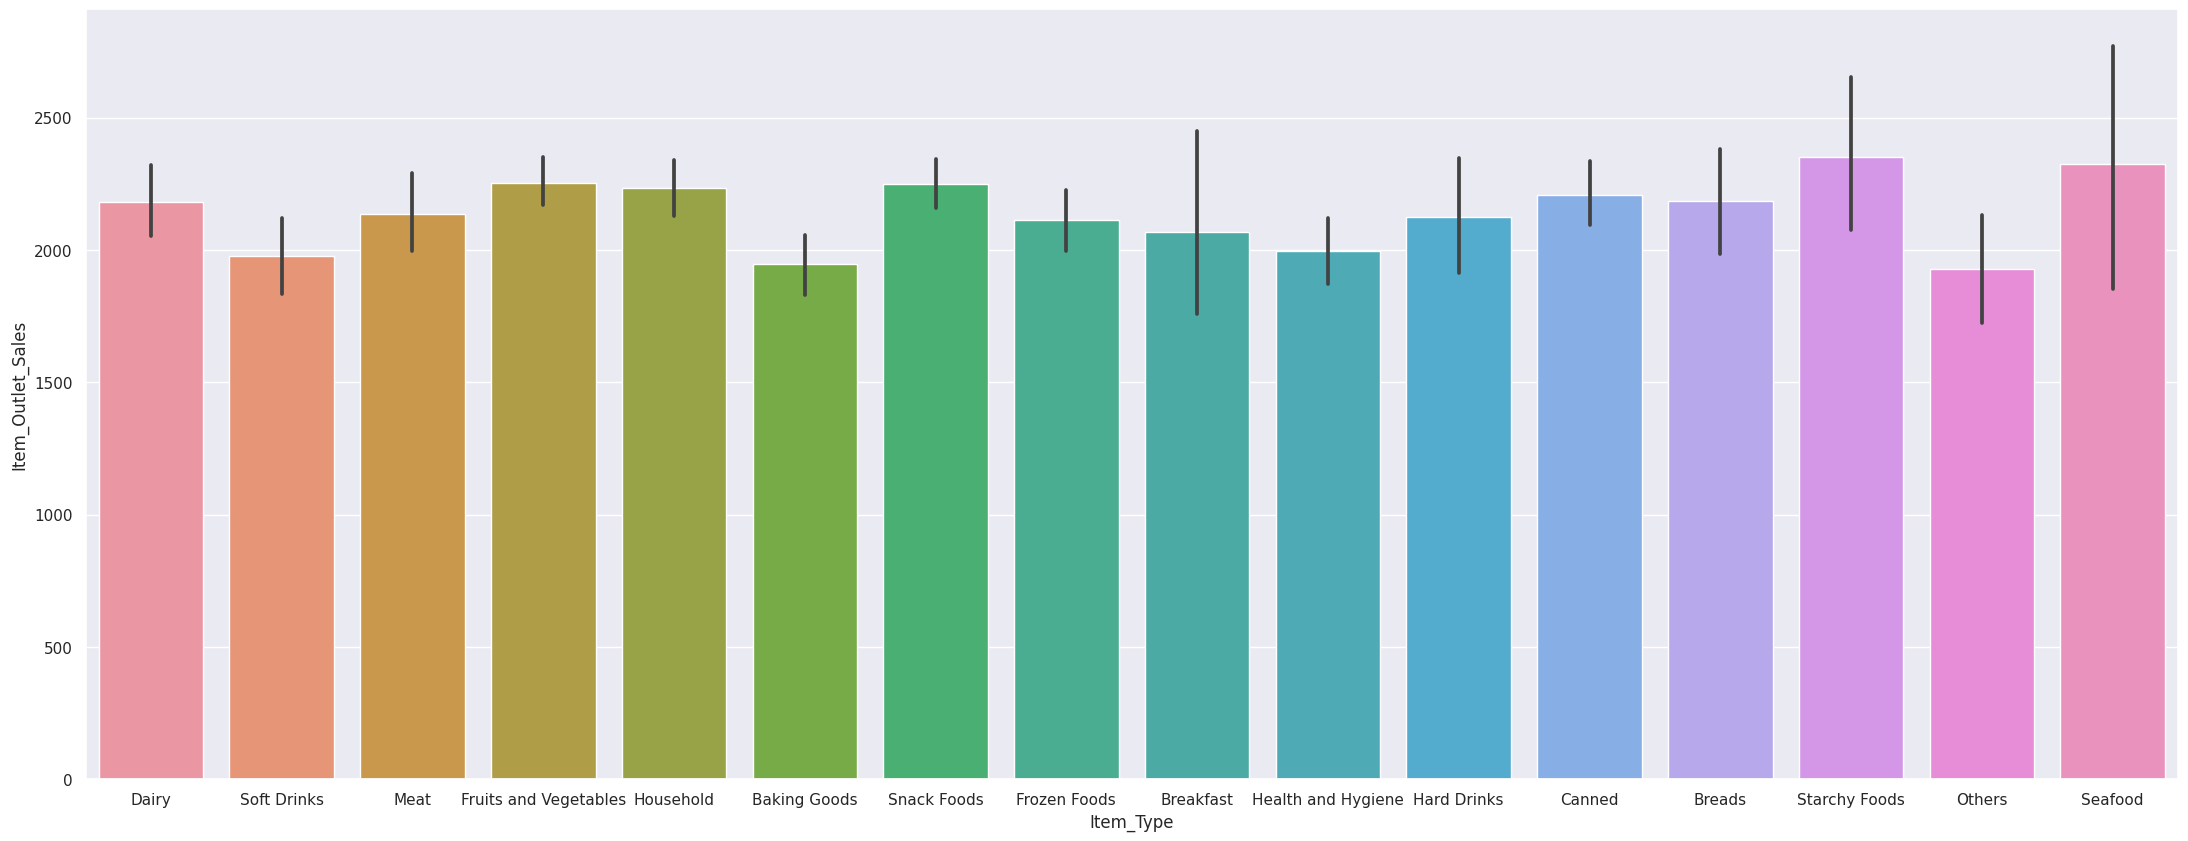

In [ ]:
plt.figure(figsize=(27,10))
sns.barplot(x = 'Item_Type',y = 'Item_Outlet_Sales', data=df)
plt.show()

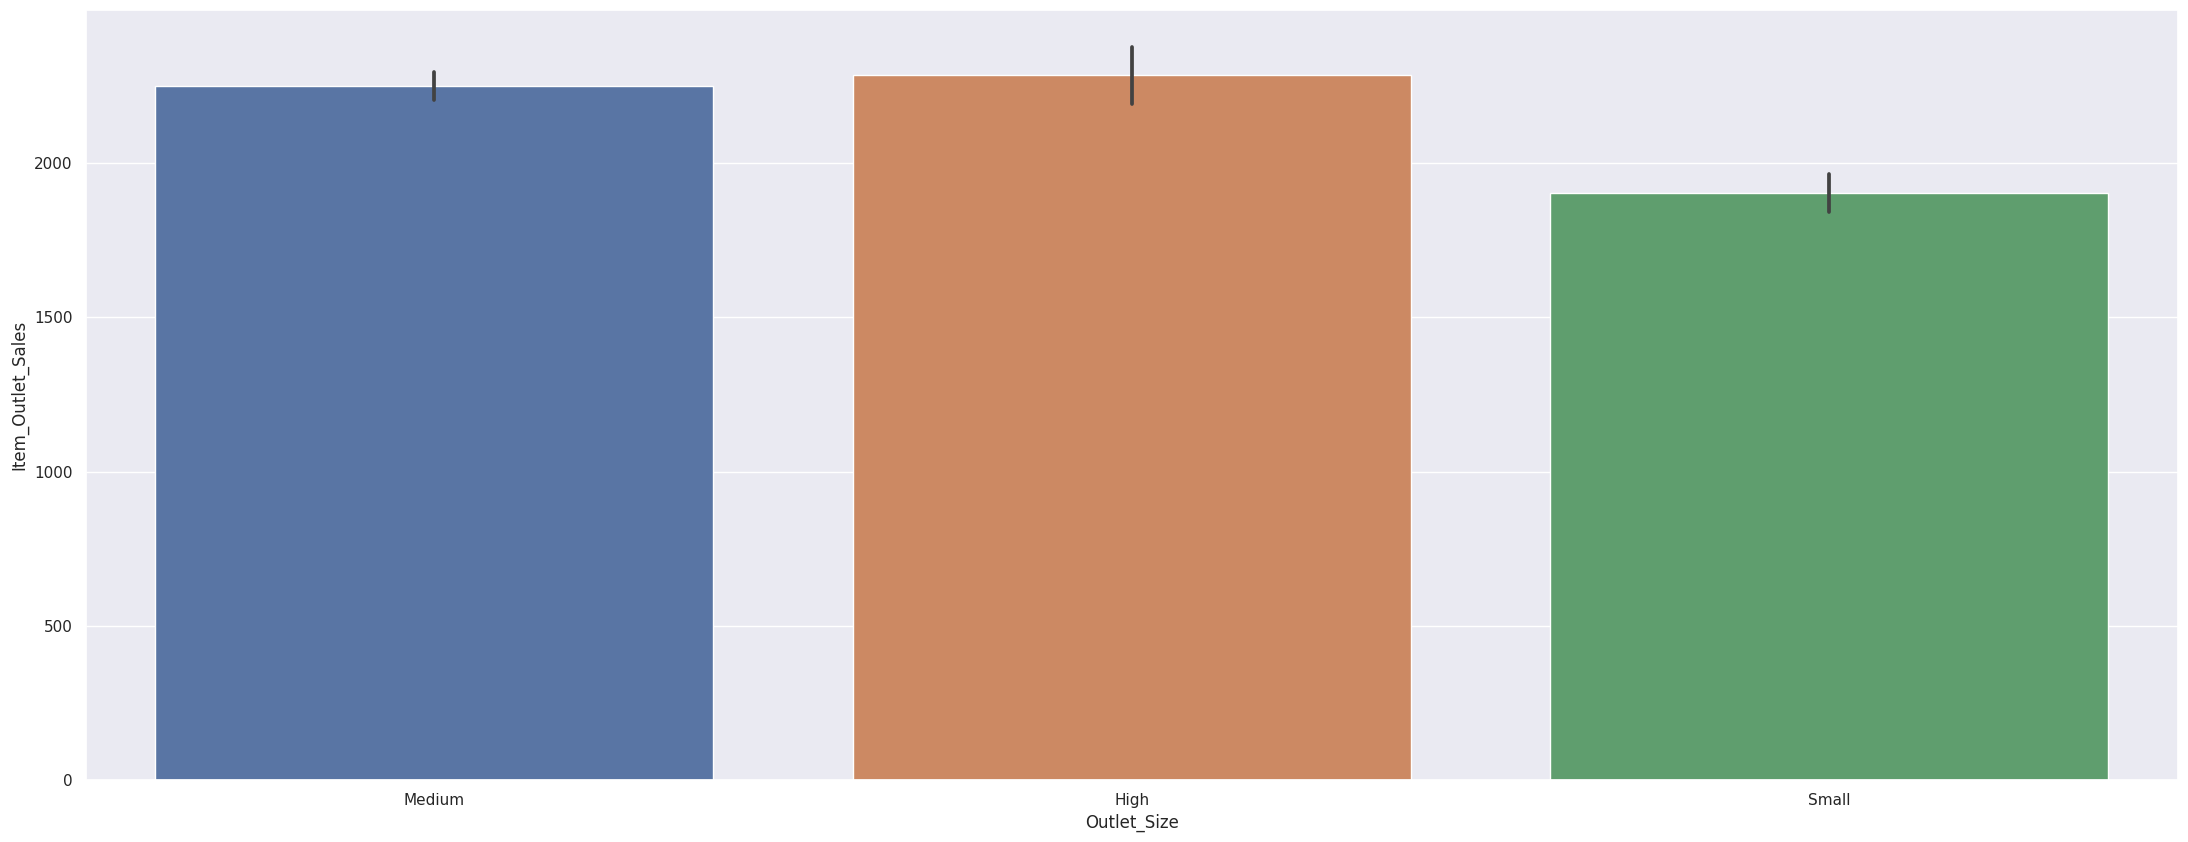

In [ ]:
plt.figure(figsize=(27,10))
sns.barplot(x = 'Outlet_Size',y = 'Item_Outlet_Sales', data=df)
plt.show()

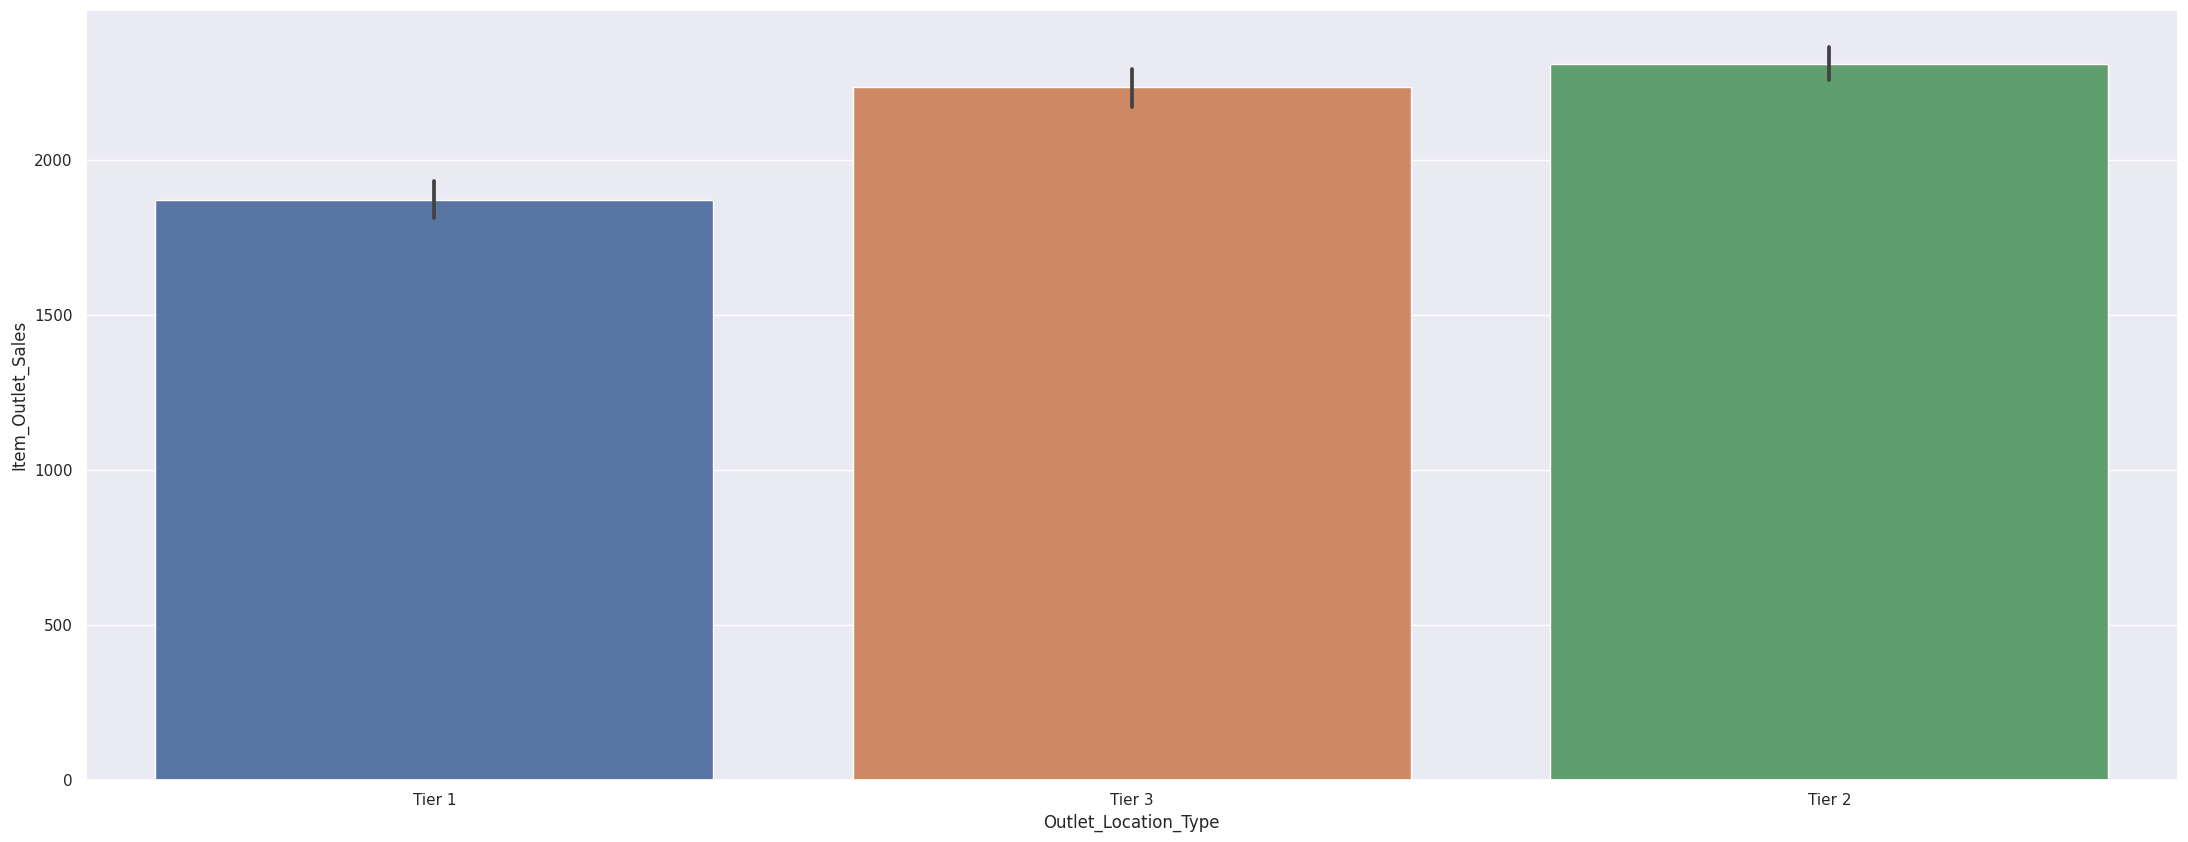

In [ ]:
plt.figure(figsize=(27,10))
sns.barplot(x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales', data=df)
plt.show()

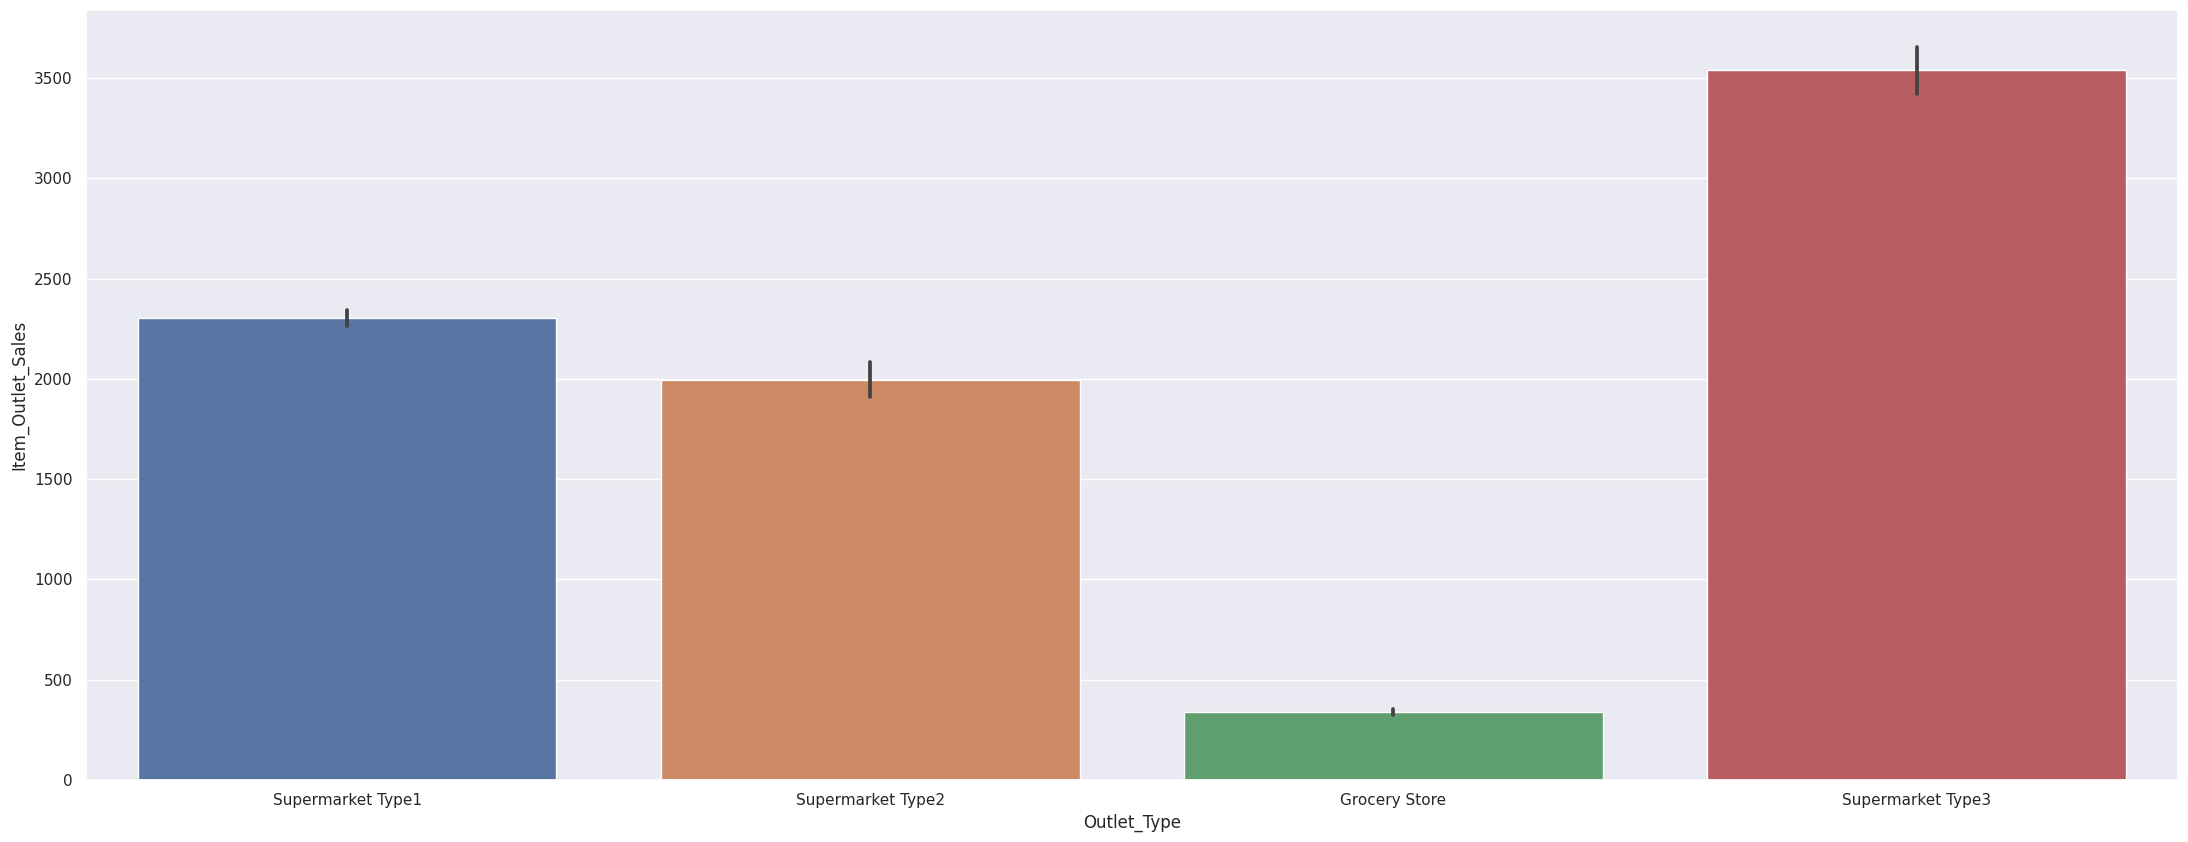

In [ ]:
plt.figure(figsize=(27,10))
sns.barplot(x = 'Outlet_Type',y = 'Item_Outlet_Sales', data=df)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 65.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 62.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


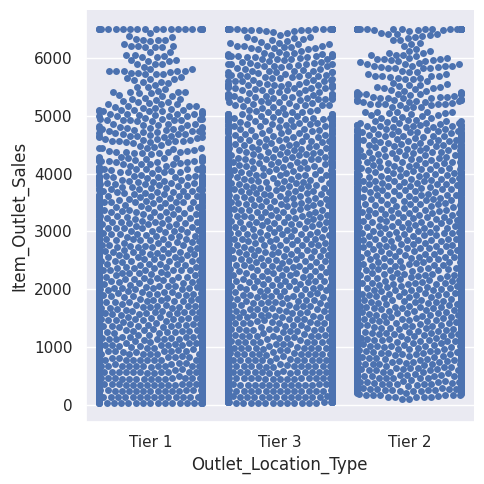

In [ ]:
sns.set({"figure.figsize":(27,10)})
sns.catplot(data=df, x="Outlet_Location_Type", y="Item_Outlet_Sales",kind="swarm")

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

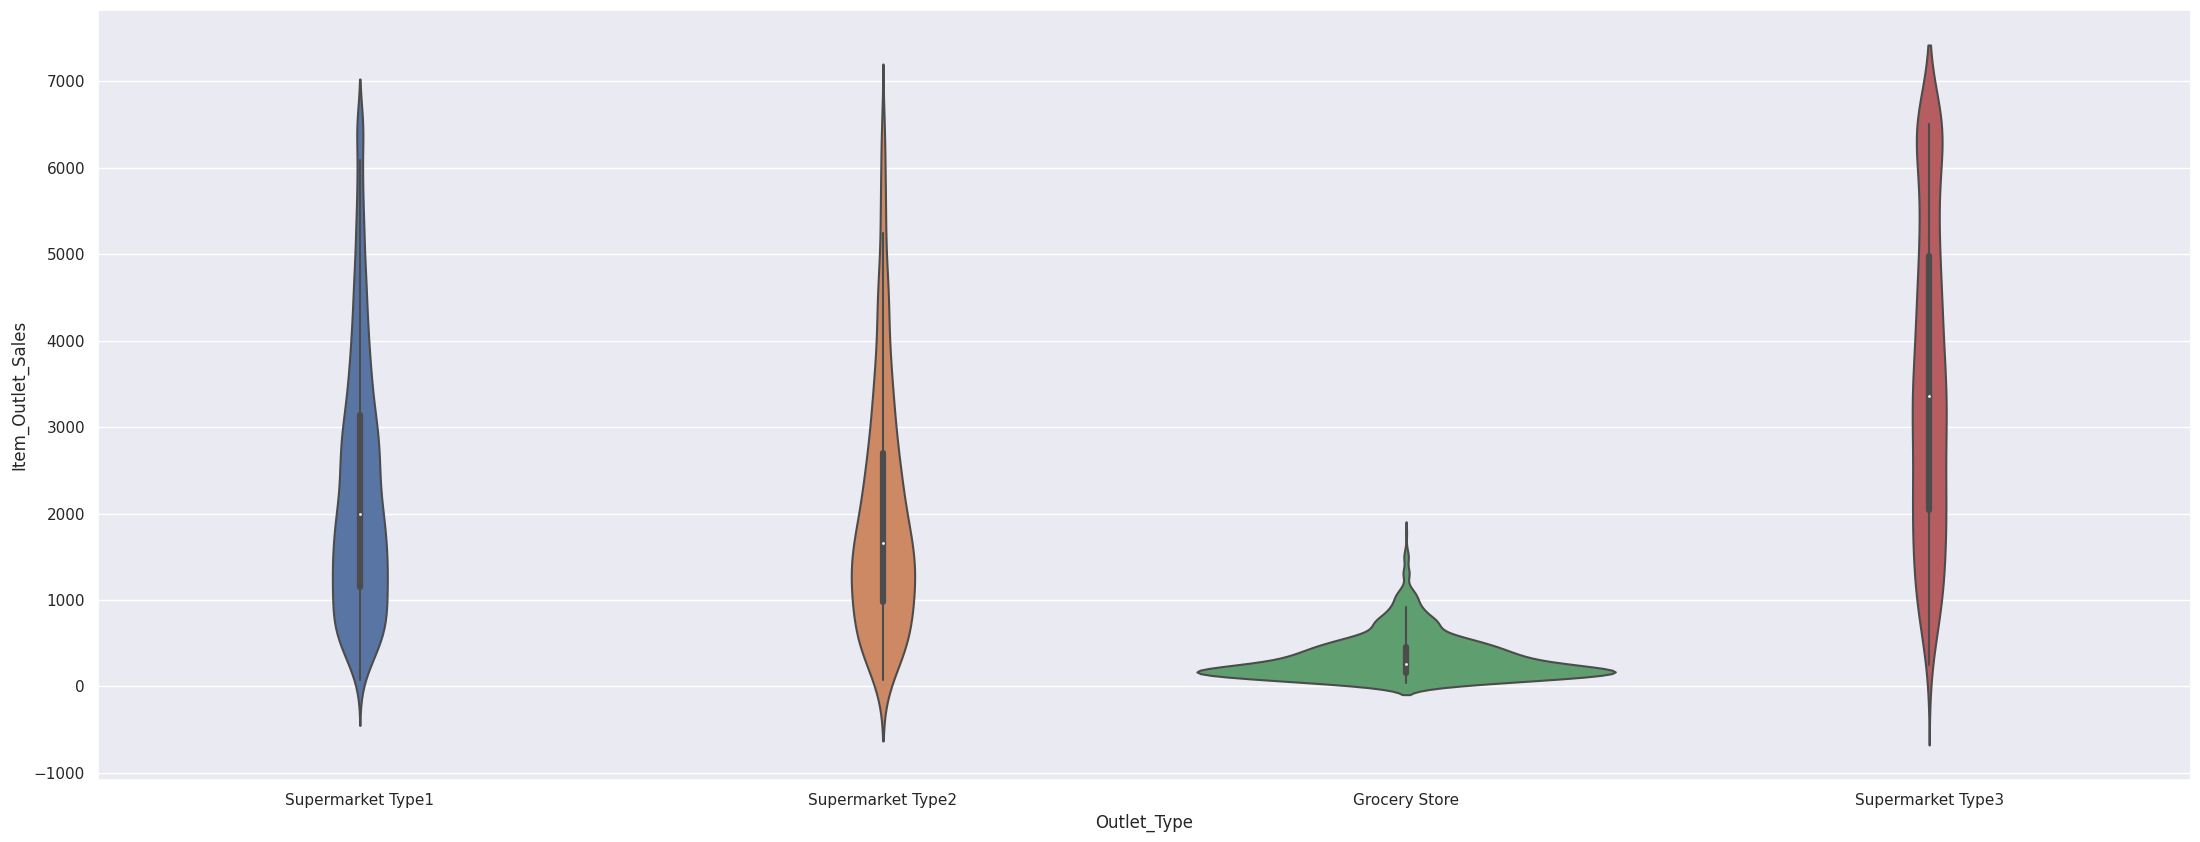

In [ ]:
sns.violinplot(x = 'Outlet_Type',y = 'Item_Outlet_Sales', data=df)

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

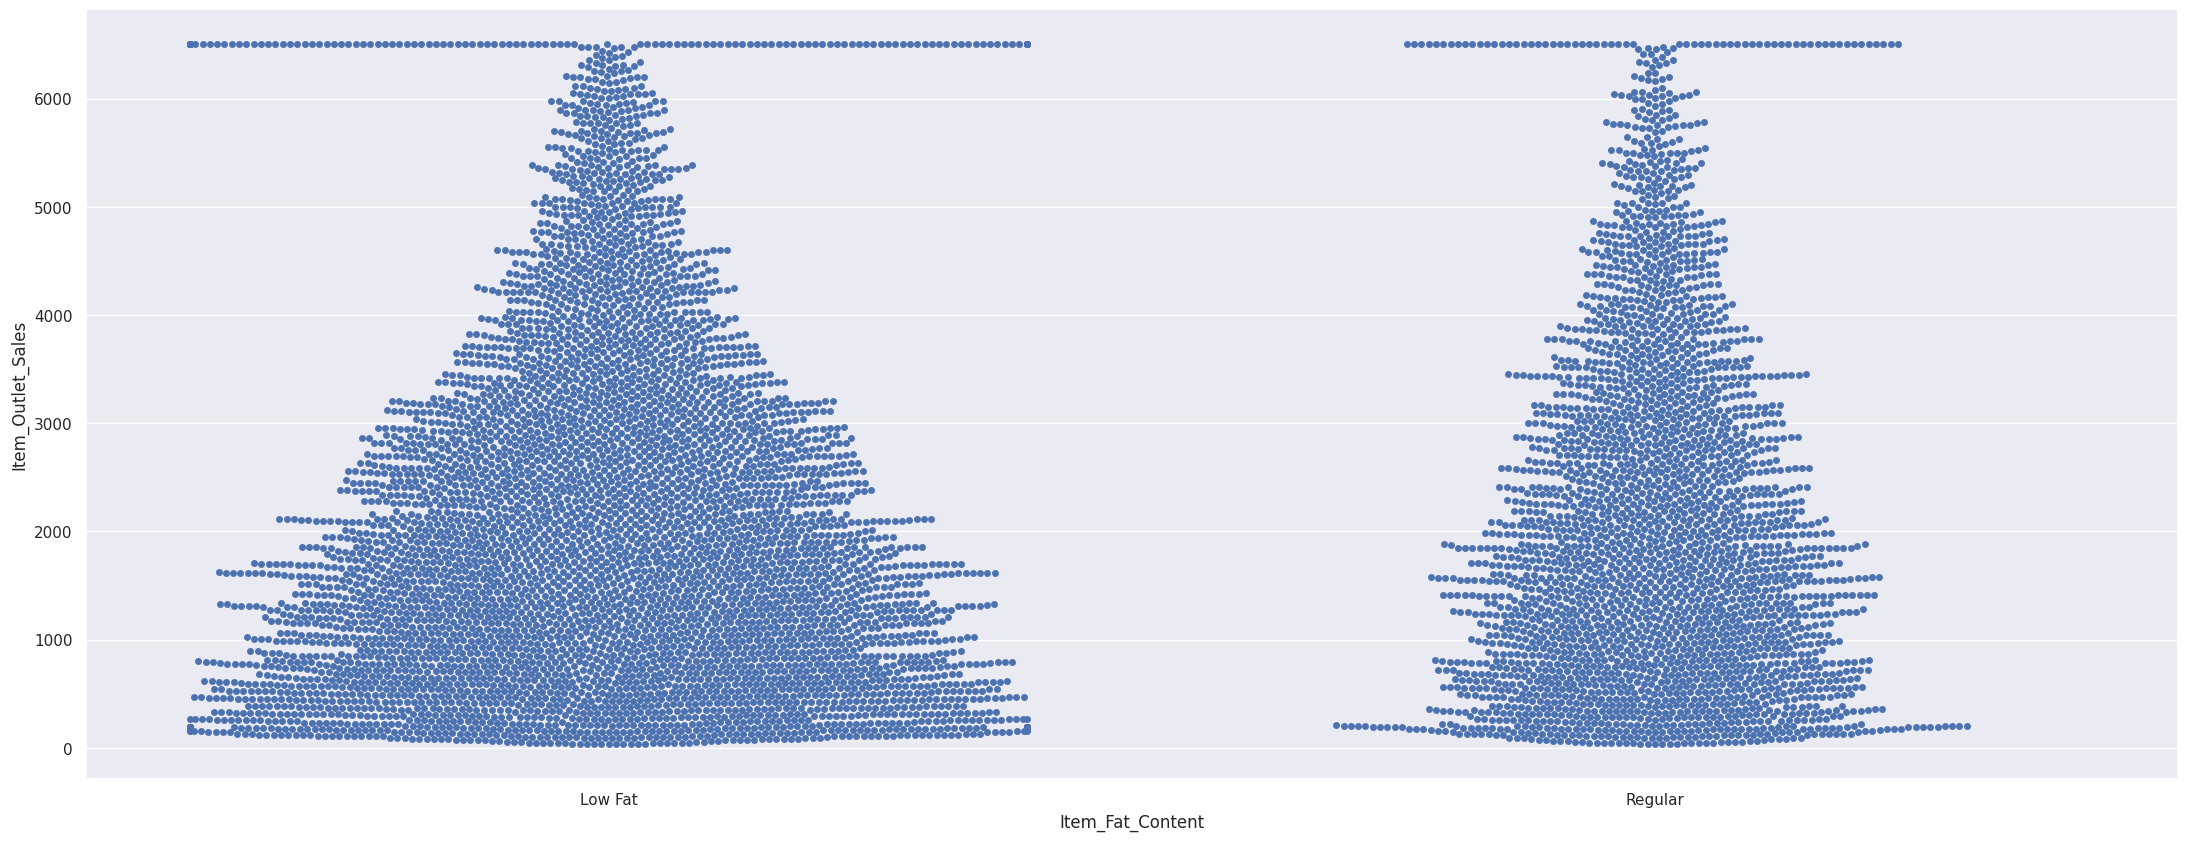

In [ ]:
sns.swarmplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales', data=df)

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<ipython-input-62-d3d11fa45c32>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


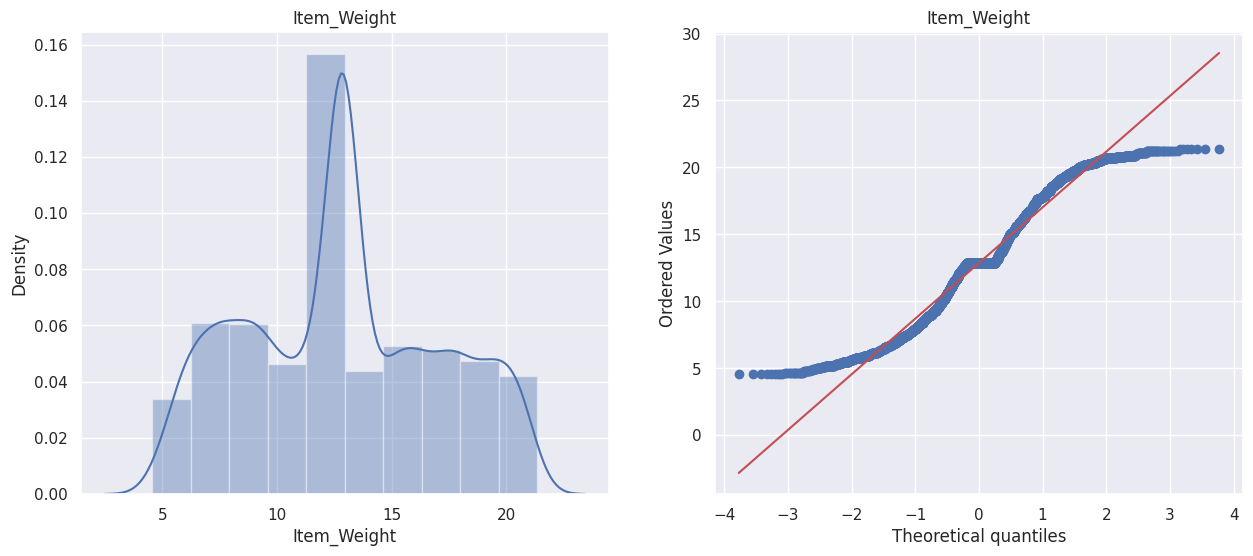

<ipython-input-62-d3d11fa45c32>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


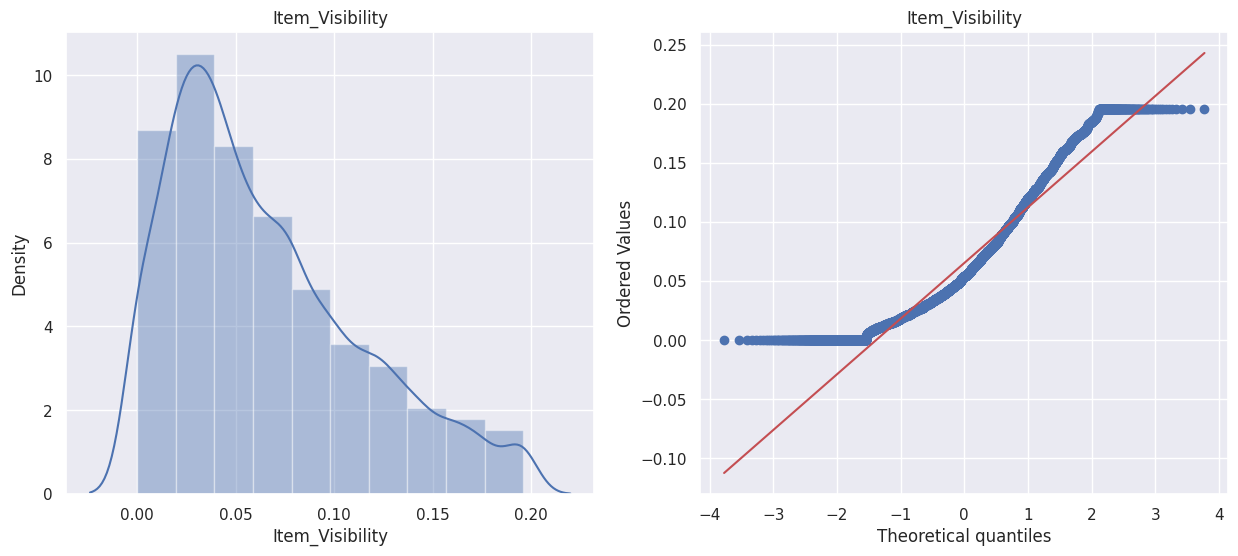

<ipython-input-62-d3d11fa45c32>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


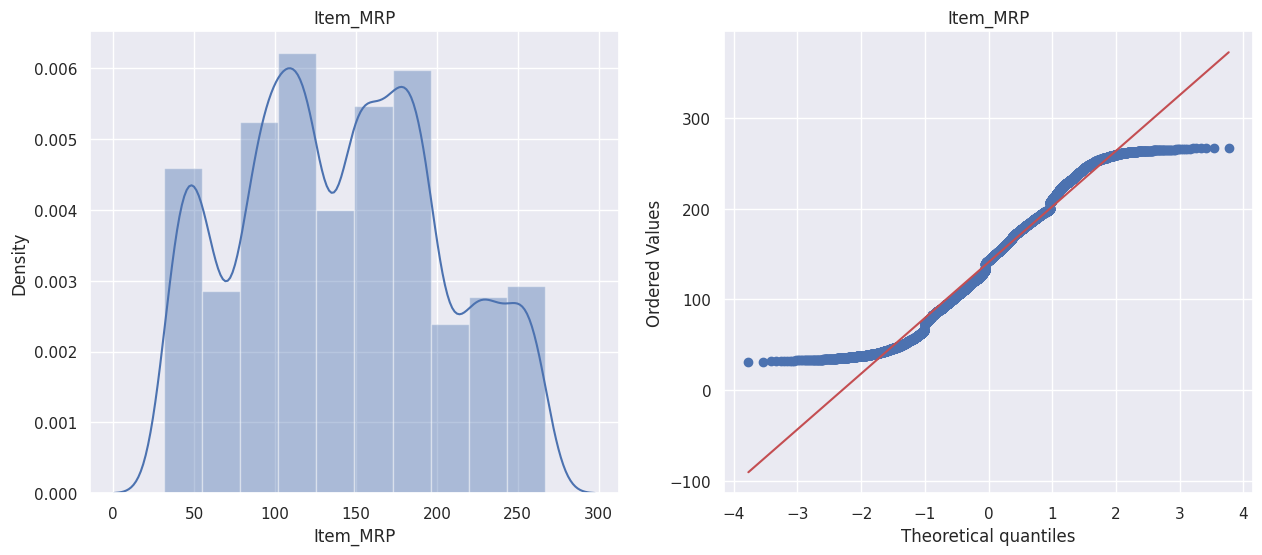

<ipython-input-62-d3d11fa45c32>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


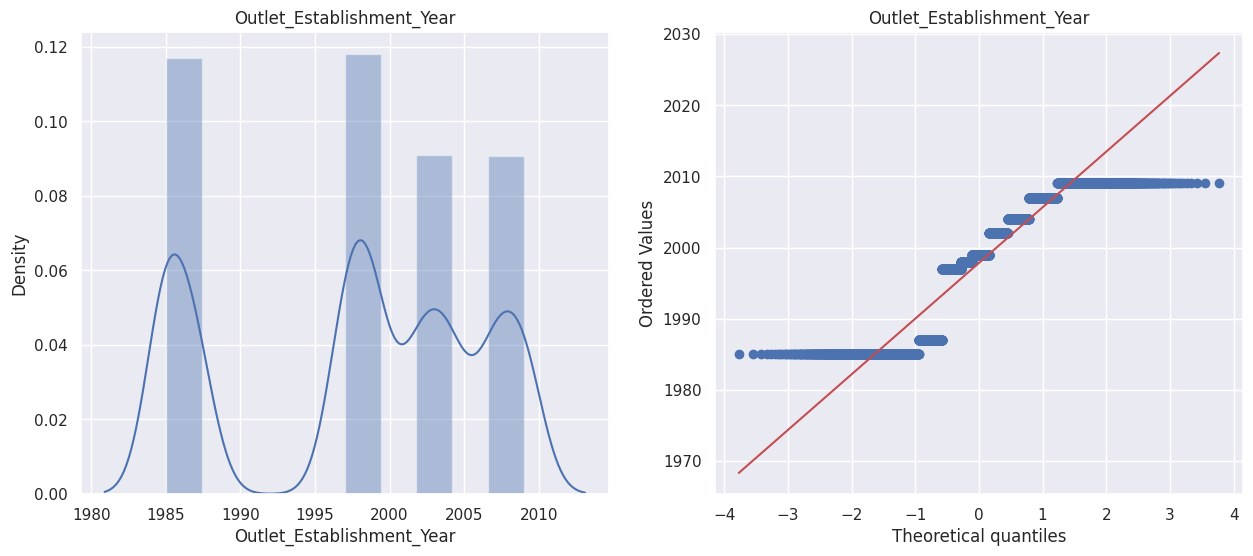

<ipython-input-62-d3d11fa45c32>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


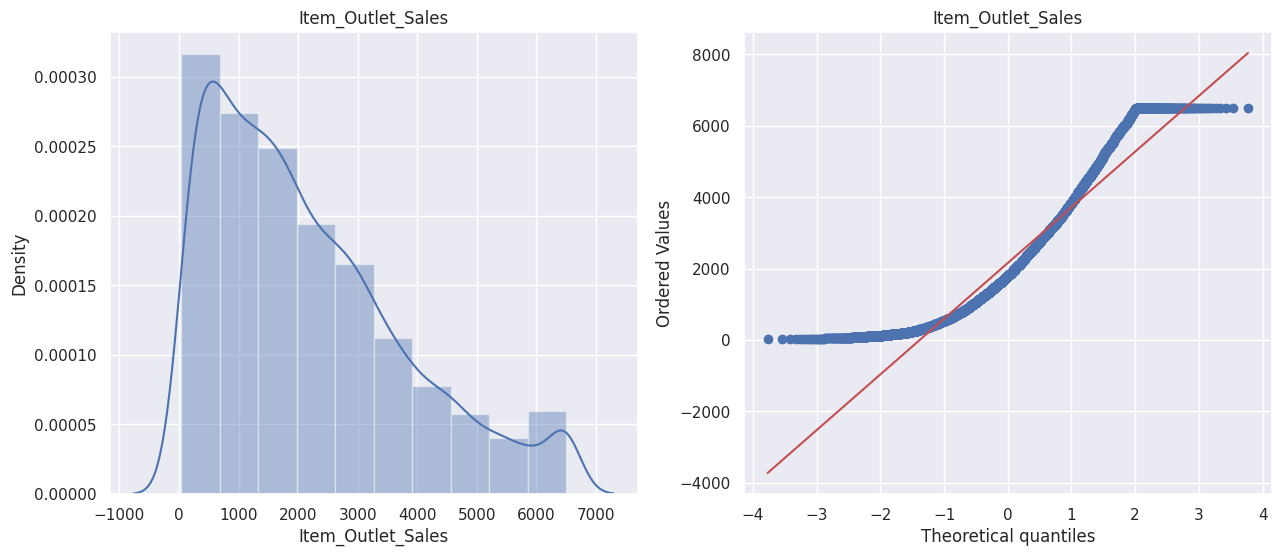

In [ ]:
def plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #df[variable].hist()
    sns.distplot(df[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in num_col.columns:
  plots(df, i)

# 7).Feature Engineering

#### **Create New Feature**

In [ ]:
df["Sales_Category_By_Outlet_Type"] = df["Outlet_Type"].copy()
for i in range(len(df)):
    if df["Outlet_Type"][i] == "Supermarket Type1":
        df["Sales_Category_By_Outlet_Type"][i] = "High Sales"
    elif df["Outlet_Type"][i] == "Grocery Store":
        df["Sales_Category_By_Outlet_Type"][i] = "Moderate to High Sales"
    elif df["Outlet_Type"][i] == "Supermarket Type2":
        df["Sales_Category_By_Outlet_Type"][i] = "Moderate Sales"
    elif df["Outlet_Type"][i] == "Supermarket Type3":
        df["Sales_Category_By_Outlet_Type"][i] = "Moderate to Low Sales"


<ipython-input-63-f38c7e91df33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sales_Category_By_Outlet_Type"][i] = "High Sales"
<ipython-input-63-f38c7e91df33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sales_Category_By_Outlet_Type"][i] = "Moderate Sales"
<ipython-input-63-f38c7e91df33>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sales_Category_By_Outlet_Type"][i] = "Moderate to High Sales"
<ipython-input-63-

In [ ]:
df["Discount_Percentage"] = ((df["Item_MRP"] - df["Item_Outlet_Sales"]) / df["Item_MRP"]) * 100

#### Convert Categorical Data To Number

In [ ]:
le = LabelEncoder()
#Label = ["Item_Fat_Content", "Outlet_Size" ,"Outlet_Location_Type"]
df1 = df.copy()

for i in df1.columns:
  df1[i] = le.fit_transform(df1[i])

df1.shape

(8523, 14)

In [ ]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Sales_Category_By_Outlet_Type,Discount_Percentage
0,156,284,0,664,4,5592,9,4,1,0,1,2540,0,4093
1,8,57,1,880,14,473,3,8,1,2,2,422,1,5964
2,662,376,0,715,10,2901,9,4,1,0,1,1639,0,4205
3,1121,393,1,0,6,4227,0,3,1,2,0,670,2,7059
4,1297,265,0,0,9,627,1,1,0,2,1,865,0,2852


In [ ]:
# Dropping irrelevant columns
df1  = df1.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [ ]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Sales_Category_By_Outlet_Type,Discount_Percentage
0,284,0,664,5592,1,0,2540,0,4093
1,57,1,880,473,1,2,422,1,5964
2,376,0,715,2901,1,0,1639,0,4205
3,393,1,0,4227,1,2,670,2,7059
4,265,0,0,627,0,2,865,0,2852


In [ ]:
df1.shape

(8523, 9)

#### **Mutual Information**

In [ ]:
Y1 = df1["Item_Outlet_Sales"]
df1 = df1.drop(["Item_Outlet_Sales"],axis=1)
X1 = df1

In [ ]:
X1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Sales_Category_By_Outlet_Type,Discount_Percentage
0,284,0,664,5592,1,0,0,4093
1,57,1,880,473,1,2,1,5964
2,376,0,715,2901,1,0,0,4205
3,393,1,0,4227,1,2,2,7059
4,265,0,0,627,0,2,0,2852
...,...,...,...,...,...,...,...,...
8518,125,0,3912,4955,0,2,0,4837
8519,233,1,3278,2023,1,1,0,6868
8520,299,0,2302,1263,2,1,0,4430
8521,149,1,7175,1857,1,2,1,3059


In [ ]:
Y1

0       2540
1        422
2       1639
3        670
4        865
        ... 
8518    2047
8519     516
8520    1018
8521    1466
8522     697
Name: Item_Outlet_Sales, Length: 8523, dtype: int64

In [ ]:
mi_score1 = mutual_info_regression(X1,Y1)
mi_score1 = pd.Series(mi_score1)
mi_score1.index = X1.columns
mi_score1.sort_values(ascending=True)

Outlet_Size                      0.010136
Item_Fat_Content                 0.022375
Outlet_Location_Type             0.042073
Item_Visibility                  0.043201
Item_Weight                      0.048455
Sales_Category_By_Outlet_Type    0.265290
Item_MRP                         0.394721
Discount_Percentage              0.631711
dtype: float64

<Axes: >

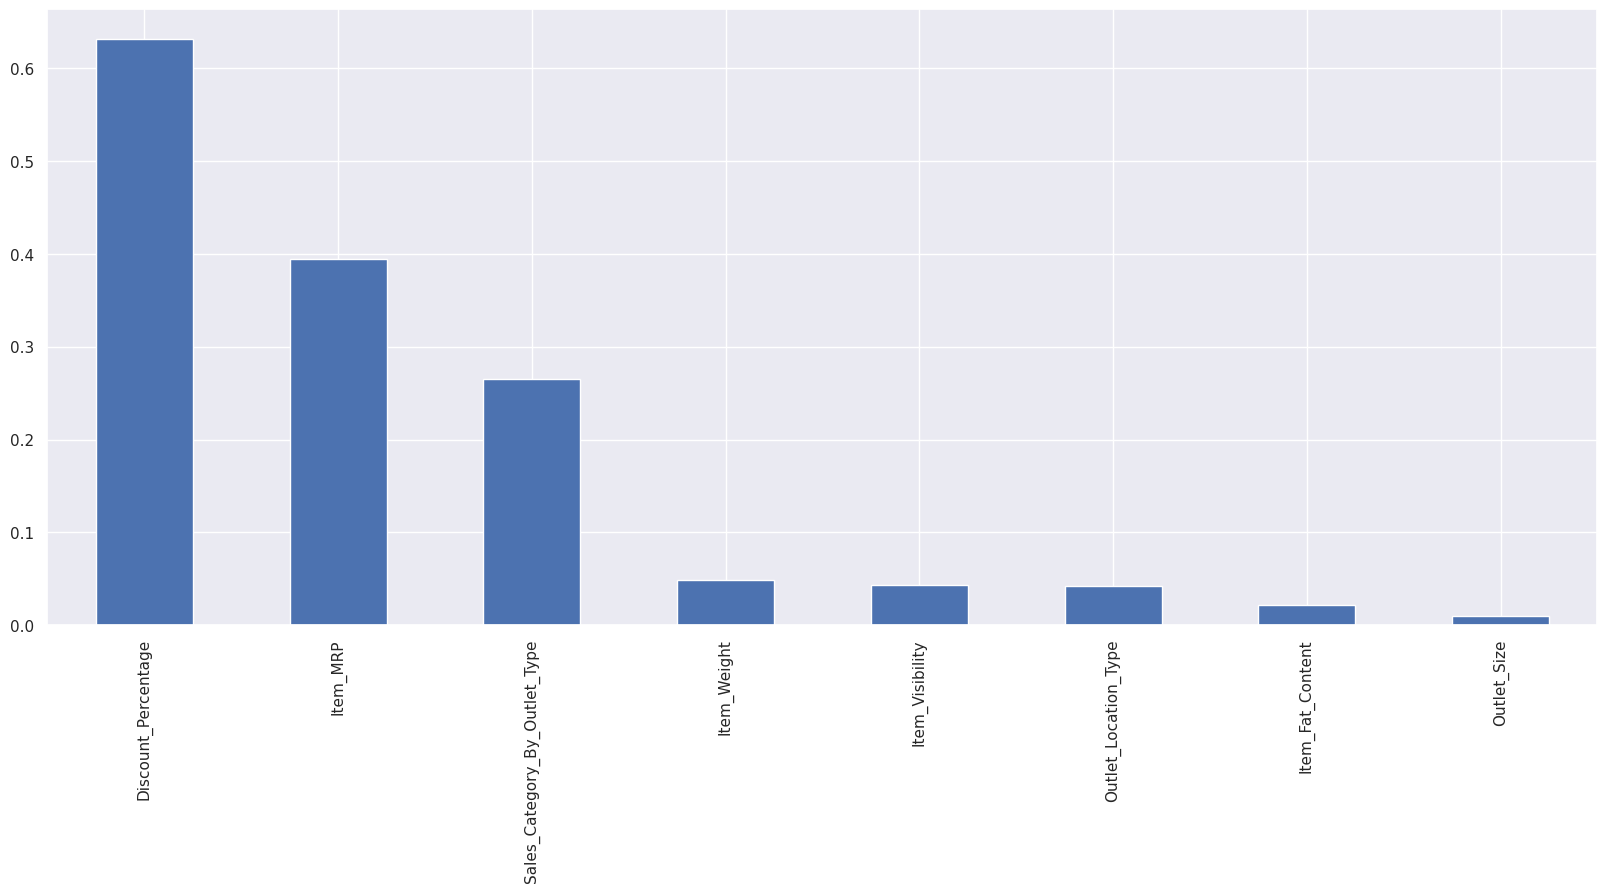

In [ ]:
mi_score1.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
select_reg =  SelectKBest(k=5, score_func=f_regression)
select_reg.fit(X1, Y1)
select_reg.get_support()

array([False, False,  True,  True,  True, False,  True,  True])

In [ ]:
X1.columns[select_reg.get_support()]

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Sales_Category_By_Outlet_Type', 'Discount_Percentage'],
      dtype='object')

In [ ]:
X1 = select_reg.transform(X1)

In [ ]:
X = df1[['Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Sales_Category_By_Outlet_Type', 'Discount_Percentage']]

In [ ]:
X

,Item_Visibility,Item_MRP,Outlet_Size,Sales_Category_By_Outlet_Type,Discount_Percentage
0,664,5592,1,0,4093
1,880,473,1,1,5964
2,715,2901,1,0,4205
3,0,4227,1,2,7059
4,0,627,0,0,2852
...,...,...,...,...,...
8518,3912,4955,0,0,4837
8519,3278,2023,1,0,6868
8520,2302,1263,2,0,4430
8521,7175,1857,1,1,3059


#### Spliting The Data

In [ ]:
train_data,test_data,train_label,test_label = train_test_split(X,Y1,test_size=0.2,random_state=1)

In [ ]:
print("train_data :",train_data.shape)
print("train_label :",train_label.shape)
print("test_data :",test_data.shape)
print("test_label :",test_label.shape)

train_data : (6818, 5)
train_label : (6818,)
test_data : (1705, 5)
test_label : (1705,)


In [ ]:
test_data.head()

,Item_Visibility,Item_MRP,Outlet_Size,Sales_Category_By_Outlet_Type,Discount_Percentage
1070,3809,115,1,0,1102
6305,4846,1347,1,1,4883
8504,6689,2153,1,3,114
5562,4829,1323,2,0,2671
1410,70,235,0,0,3505


#### **Normalizing And Scaling**

In [ ]:
# standardScaler
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [ ]:
train_data_sc.shape

(6818, 5)

In [ ]:
test_data_sc.shape

(1705, 5)

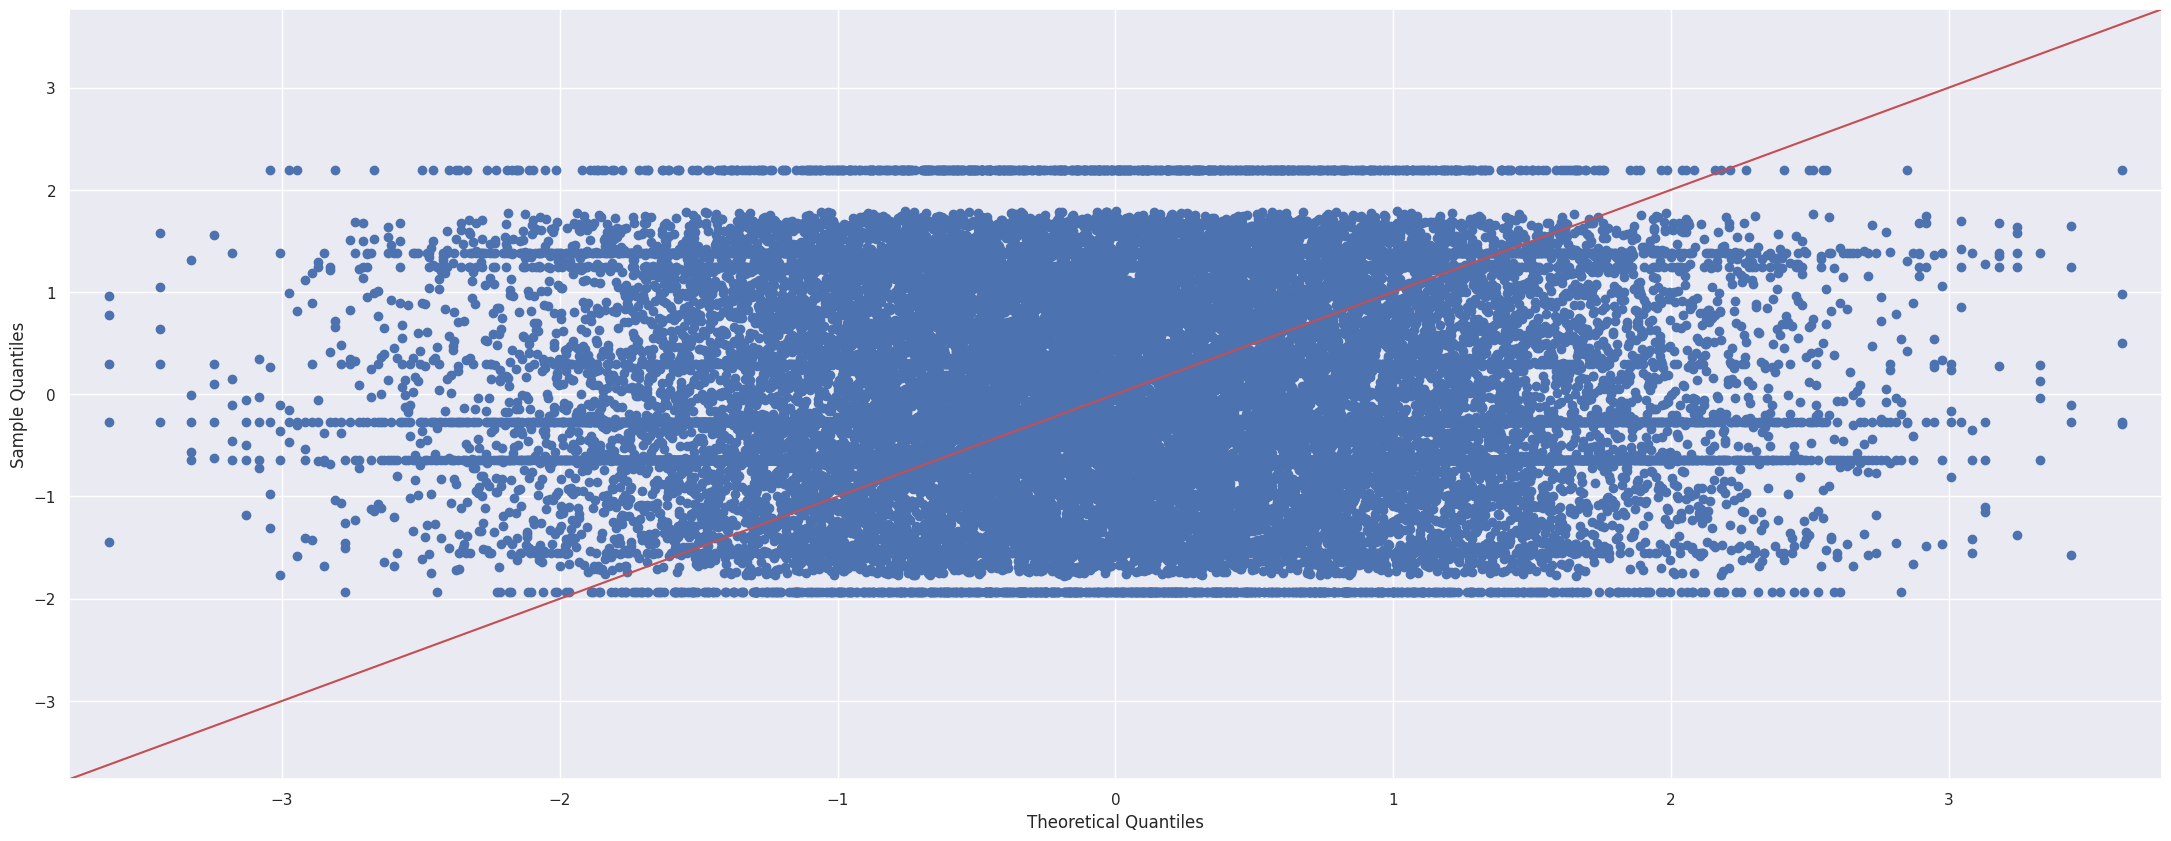

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(train_data_sc, line='45')
plt.show()

#8). **Creating Model**

#### **Regression Model**

In [ ]:
model_lr = LinearRegression()
model_lr.fit(train_data_sc,train_label)

LinearRegression()

In [ ]:
test_label

1070     834
6305     971
8504    2701
5562    1342
1410     628
        ... 
376     3182
7708    2951
3812    2159
3928    1883
7654    1383
Name: Item_Outlet_Sales, Length: 1705, dtype: int64

In [ ]:
test_data_sc

array([[ 0.05793324, -1.6155677 , -0.32622753, -0.67018009, -1.24593022],
       [ 0.49405067, -0.8951076 , -0.32622753,  0.26108075,  0.31274012],
       [ 1.26913689, -0.42376763, -0.32622753,  2.12360244, -1.65322097],
       ...,
       [-1.52167818,  0.46920523, -2.02201391, -0.67018009, -0.47133578],
       [ 0.93311199, -1.33311459, -0.32622753,  2.12360244, -1.6952692 ],
       [ 1.01596169,  0.07973573,  1.36955886, -0.67018009,  0.47928411]])

In [ ]:
y_pred = model_lr.predict(test_data_sc)

In [ ]:
y_pred.shape


(1705,)

In [ ]:
model_lr.score(test_data_sc,test_label)

0.9296048820601481

#### **Regression Model Evaluation**

In [ ]:
LR_MAE = round(mean_absolute_error(test_label,y_pred),2)
LR_MSE = round(mean_squared_error(test_label,y_pred),2)
LR_R_2 = round(r2_score(test_label,y_pred),4)
LR_CS  = round(cross_val_score(model_lr, test_data_sc, test_label, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
print("train_data Accuracy : ",cross_val_score(model_lr,train_data_sc,train_label,cv=5).mean())

 Mean Absolute Error: 173.86

 Mean Squared Error: 61652.05

 R^2 Score: 0.9296

train_data Accuracy :  0.9330083832004983


#### **RandomForestRegression Model**

In [ ]:
model_randomforestregression = RandomForestRegressor()
model_randomforestregression.fit(train_data_sc,train_label)

RandomForestRegressor()

In [ ]:
y_pred2 = model_randomforestregression.predict(test_data_sc)
y_pred2

array([ 930.86, 1025.35, 2592.33, ..., 2173.3 , 1634.13, 1403.75])

In [ ]:
model_randomforestregression.score(test_data_sc,test_label)

0.9296048820601481

#### **RandomForestRegression Evaluation**

In [ ]:
LR_MAE = round(mean_absolute_error(test_label,y_pred2),2)
LR_MSE = round(mean_squared_error(test_label,y_pred2),2)
LR_R_2 = round(r2_score(test_label,y_pred2),4)
LR_CS  = round(cross_val_score(model_randomforestregression, test_data_sc, test_label, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
print("train_data Accuracy : ",cross_val_score(model_randomforestregression,train_data_sc,train_label,cv=5).mean())

 Mean Absolute Error: 46.21

 Mean Squared Error: 4221.66

 R^2 Score: 0.9952

train_data Accuracy :  0.99963906077167


#9). **Save Model**

In [ ]:
joblib.dump(model_randomforestregression, 'BigMart_Analysis.pkl')
# Since rfr has a good accuracy as compared with others the random model has been saved and not the others.

['BigMart_Analysis.pkl']